In [ ]:
# pip install generative_diffusion # Instalación el paquete desarrollado

In [ ]:
# Por si se quiere usar los archivos locales en vez de el paquete instalado

import sys
import os
sys.path.append(os.path.abspath(".."))  # Añadir raíz del proyecto al path

In [2]:
# Importar componentes del framework de difusión
from generative_diffusion.utils import *
from generative_diffusion.diffusion import ModelFactory
from generative_diffusion.score_networks import ScoreNet

In [2]:
# Configurar parámetros
BATCH_SIZE = 32
N_EPOCHS = 30
LR = 1e-3
CHECKPOINT_INTERVAL = 5

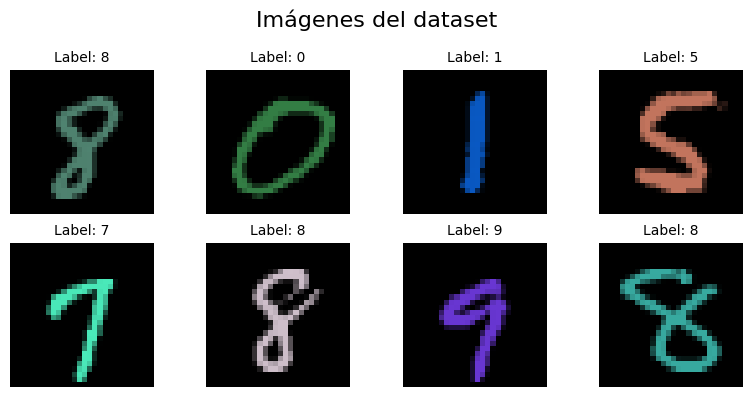

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Lambda(lambda x: x * torch.tensor([random.random(), random.random(), random.random()]).view(3,1,1))
])

dataset = datasets.MNIST(root='../data', 
                         train=True,
                         download=True,
                         transform=transform)

train_dataloader = DataLoader(
    dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

# Visualizar un batch de imágenes
show_images(train_dataloader, n_images=8, title="Imágenes del dataset")

# Modelos

---
## VE

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-10 23:14:58,611 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [6]:
# N_EPOCHS = 30
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_ve.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "ve_sde"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [61]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="euler_maruyama",
)

2025-05-11 10:57:43,336 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [62]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_euler.load_score_model("../checkpoints/ve_sde.pt")

2025-05-11 10:57:44,255 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-11 10:57:44,279 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:57:44,279 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:57:44,296 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:57:44,298 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-11 10:59:17,957 — DiffusionModel — INFO — Generando 8 muestras con 2000 pasos


Generando imágenes del dígito 0...


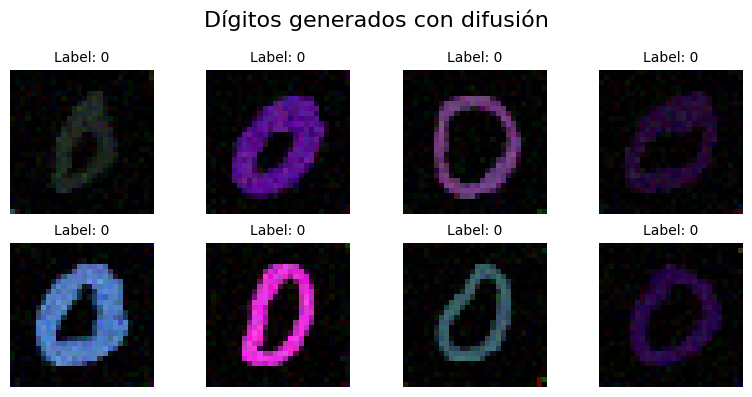

In [70]:
DIGIT_CLASS = 5

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_euler, condition = diffusion_model_ve_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_euler, title="Dígitos generados con VE: Euler Maruyama", labels=condition)

2025-05-10 23:15:20,769 — DiffusionModel — WARNING — No se proporcionó condición, se usará un tensor aleatorio de condición
2025-05-10 23:15:20,770 — DiffusionModel — INFO — Generando 16 muestras con 5000 pasos


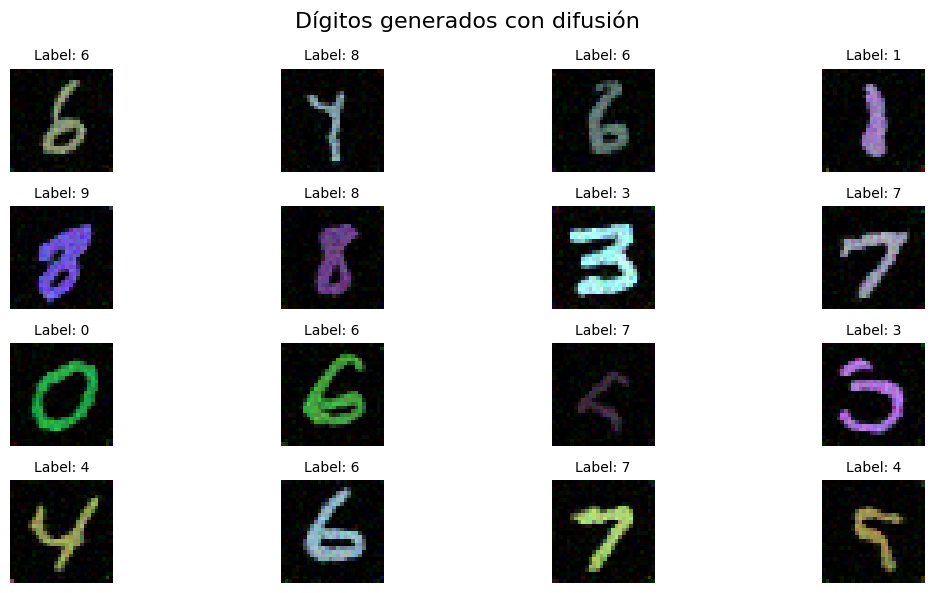

In [10]:
# Parámetros para generación
N_SAMPLES = 16
N_STEPS = 5000

# Generar imágenes
generated_images_ve_euler, condition = diffusion_model_ve_euler.generate(
    n_samples=N_SAMPLES,
    n_steps=N_STEPS,
)

# Mostrar imágenes generadas
show_images(generated_images_ve_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - Corrector

In [11]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="predictor_corrector",
)

2025-05-10 23:16:08,720 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [12]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_predictor.load_score_model("../checkpoints/ve_sde.pt")

2025-05-10 23:16:08,754 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-10 23:16:08,759 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:16:08,759 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:16:08,771 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:16:08,775 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:16:08,786 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 7...


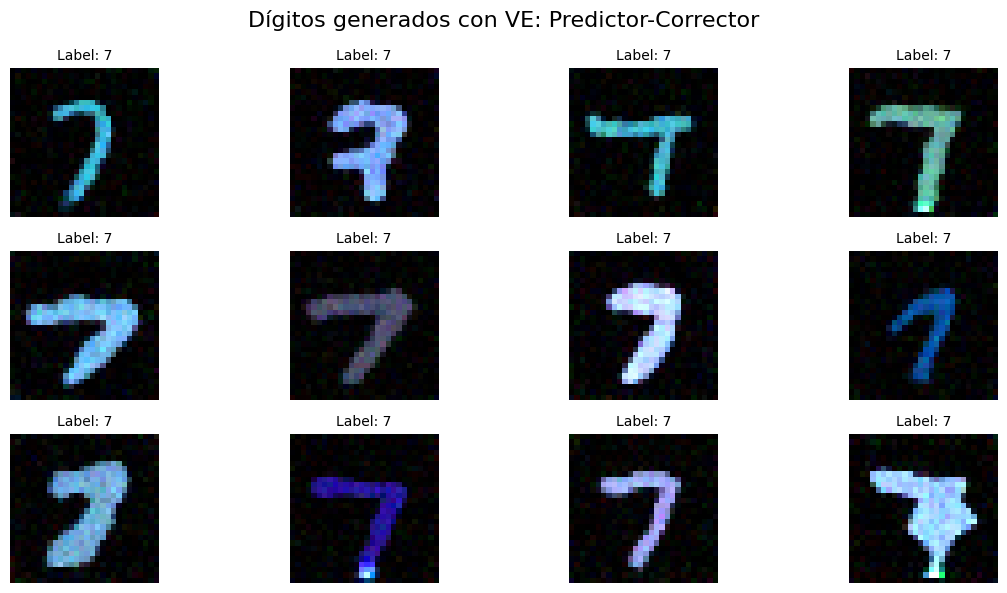

In [13]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_predictor, condition = diffusion_model_ve_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_predictor, title="Dígitos generados con VE: Predictor-Corrector", labels=condition)

### Flow ODE

In [14]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-10 23:19:10,379 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [15]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_flow_ode.load_score_model("../checkpoints/ve_sde.pt")

2025-05-10 23:19:10,416 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-10 23:19:10,421 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:19:10,422 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:19:10,432 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:19:10,435 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:19:10,447 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 9...


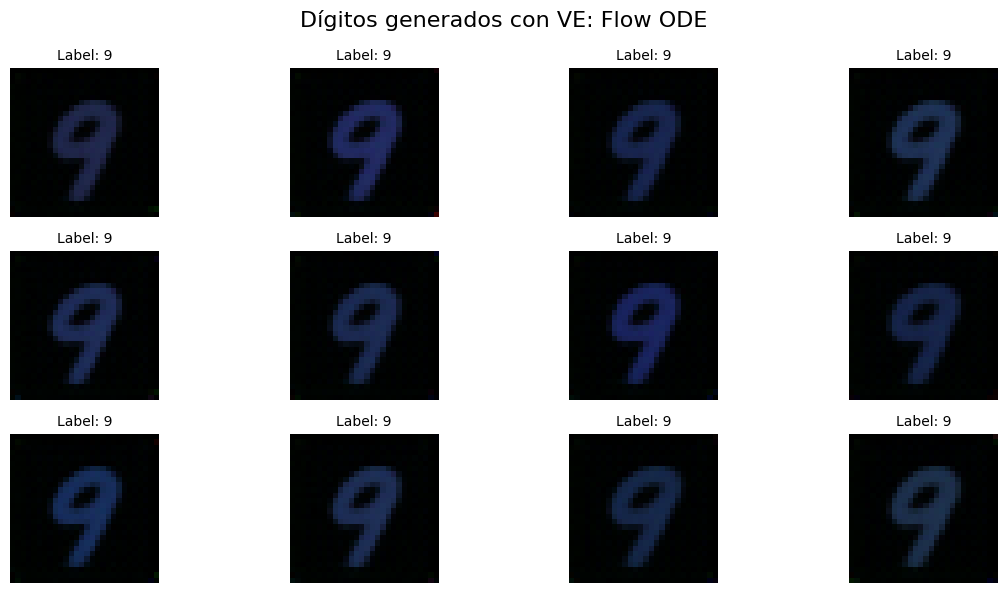

In [16]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_flow_ode, condition = diffusion_model_ve_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_flow_ode, title="Dígitos generados con VE: Flow ODE", labels=condition)

### Exponential Integrator

In [17]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="exponential_integrator",
)

2025-05-10 23:19:42,387 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [18]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_exponential.load_score_model("../checkpoints/ve_sde.pt")

2025-05-10 23:19:42,424 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-10 23:19:42,428 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:19:42,429 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:19:42,442 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:19:42,444 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:19:42,457 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 5...


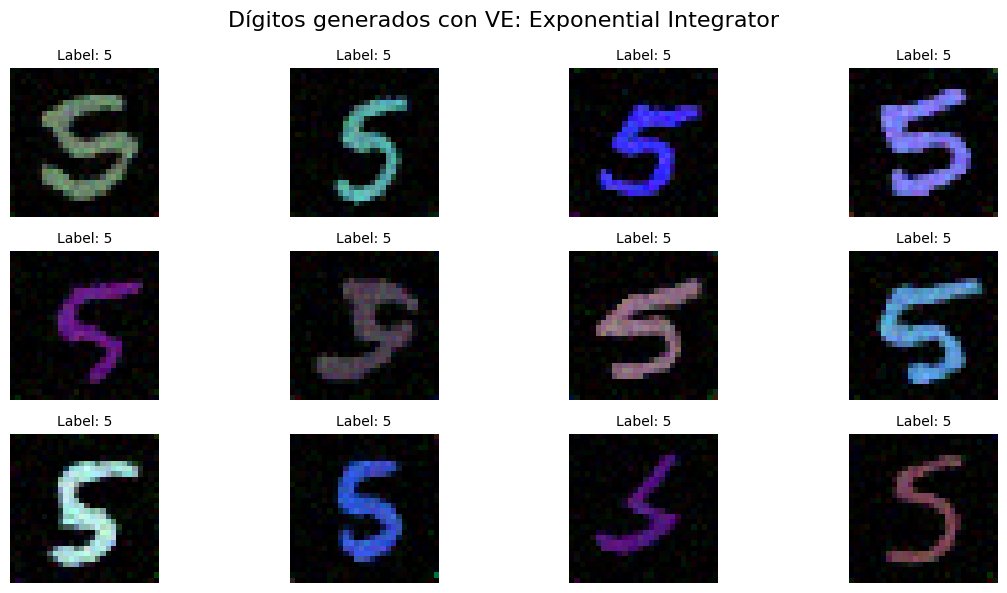

In [19]:
DIGIT_CLASS = 5

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_exponential, condition = diffusion_model_ve_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_exponential, title="Dígitos generados con VE: Exponential Integrator", labels=condition)

---
## VP - Linear

In [20]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-10 23:20:00,319 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [21]:
# N_EPOCHS = 32
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [22]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-10 23:20:00,364 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [23]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_euler.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-10 23:20:00,373 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-10 23:20:00,399 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:20:00,400 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:20:00,409 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:20:00,411 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:20:00,423 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 8...


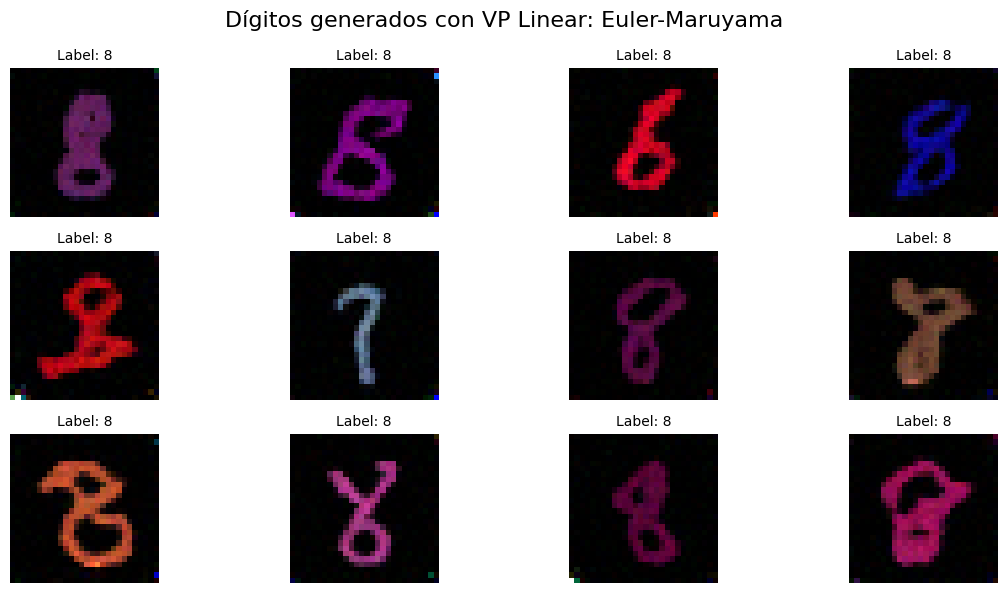

In [24]:
DIGIT_CLASS = 8

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_euler, condition = diffusion_model_vp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_euler, title="Dígitos generados con VP Linear: Euler-Maruyama", labels=condition)

### Predictor corrector

In [25]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-10 23:20:21,443 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [26]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_predictor.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-10 23:20:21,459 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-10 23:20:21,464 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:20:21,464 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:20:21,474 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:20:21,477 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:20:21,487 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 3...


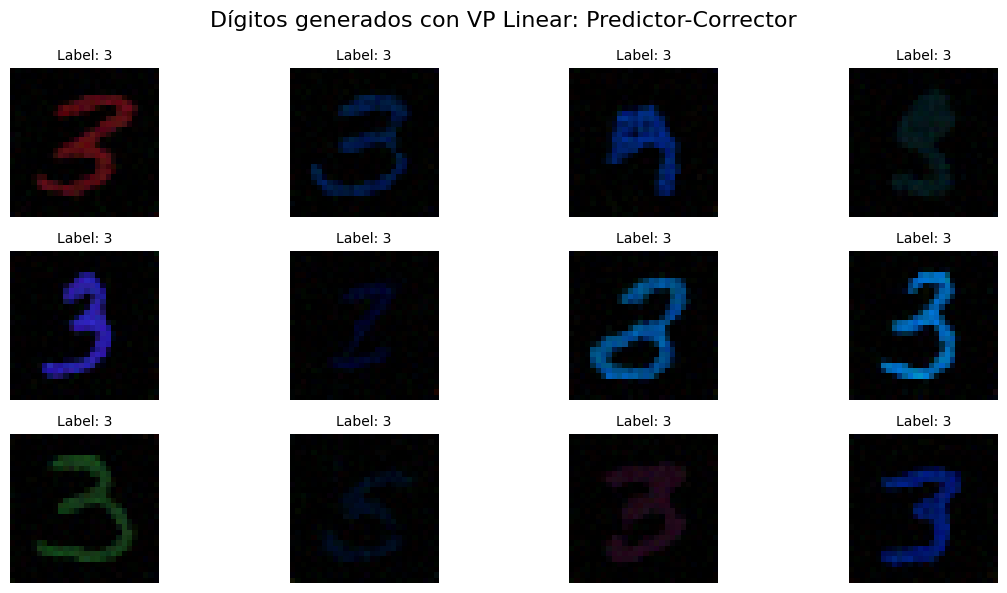

In [27]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_predictor, condition = diffusion_model_vp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_predictor, title="Dígitos generados con VP Linear: Predictor-Corrector", labels=condition)

### Flow ODE

In [28]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_score': 1.05},
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-10 23:21:51,176 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [29]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_flow_ode.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-10 23:21:51,212 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-10 23:21:51,217 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:21:51,218 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:21:51,230 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:21:51,233 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:21:51,245 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 0...


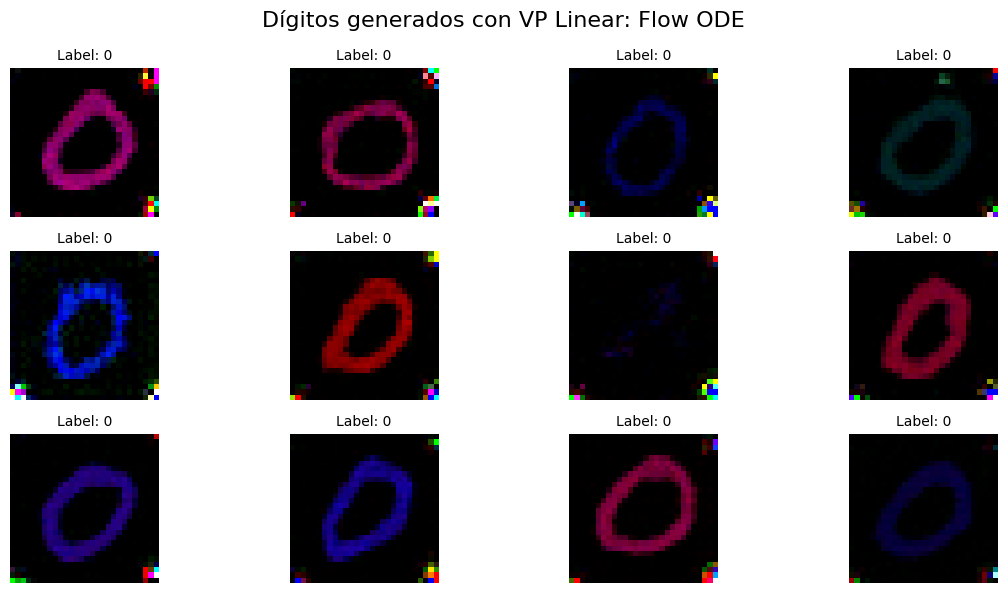

In [30]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_flow_ode, condition = diffusion_model_vp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_flow_ode, title="Dígitos generados con VP Linear: Flow ODE", labels=condition)

### Exponential Integrator

In [31]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-10 23:22:31,059 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [32]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_exponential.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-10 23:22:31,096 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-10 23:22:31,099 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:22:31,100 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:22:31,110 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:22:31,114 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:22:31,123 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 4...


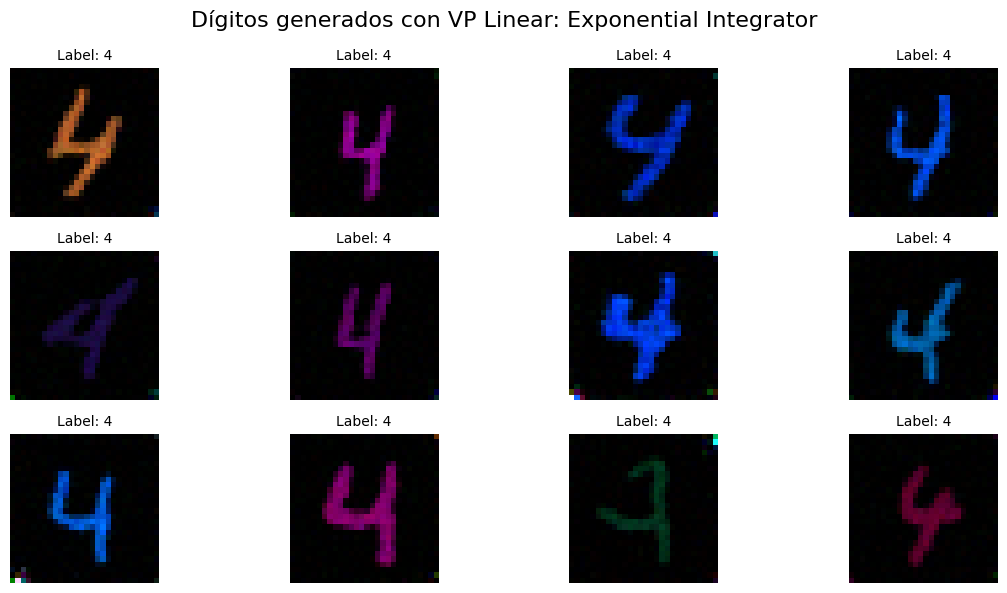

In [33]:
DIGIT_CLASS = 4

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_exponential_integrator, condition = diffusion_model_vp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_exponential_integrator, title="Dígitos generados con VP Linear: Exponential Integrator", labels=condition)

---
## VP - Cosine

In [34]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-10 23:22:52,039 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [35]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [36]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.4, 'coef_score': 1.2},
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-10 23:22:52,084 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [37]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_euler.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-10 23:22:52,090 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-10 23:22:52,113 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:22:52,114 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:22:52,122 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:22:52,124 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:22:52,136 — DiffusionModel — INFO — Generando 12 muestras con 3000 pasos


Generando imágenes del dígito 2...


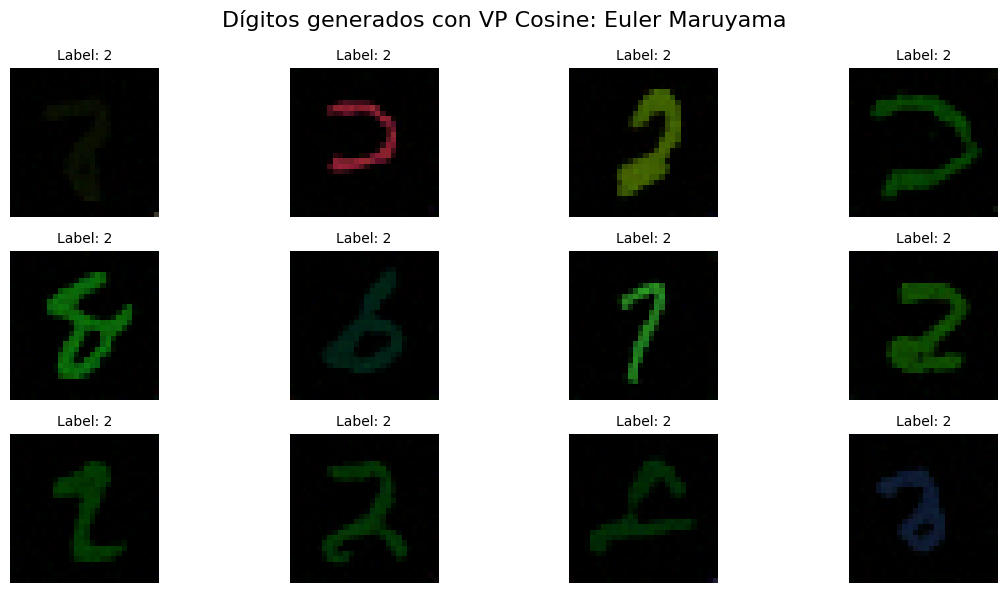

In [38]:
DIGIT_CLASS = 2

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 3000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_euler, condition = diffusion_model_vp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_euler, title="Dígitos generados con VP Cosine: Euler Maruyama", labels=condition)

### Predictor - Corrector

In [39]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-10 23:23:16,820 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [40]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_predictor.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-10 23:23:16,856 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-10 23:23:16,860 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:23:16,862 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:23:16,871 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:23:16,876 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:23:16,885 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 6...


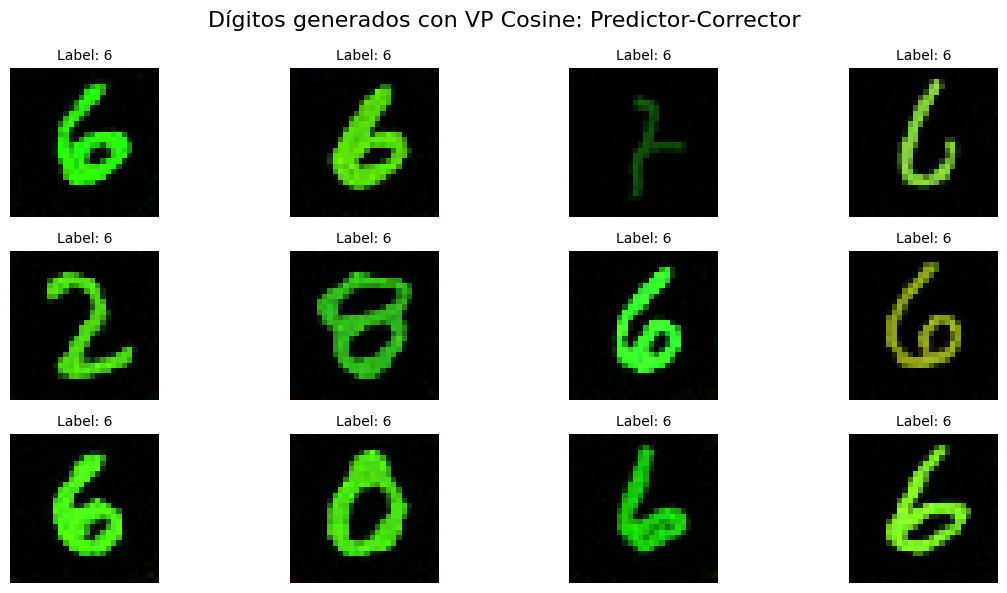

In [41]:
DIGIT_CLASS = 6

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_predictor, condition = diffusion_model_vp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_predictor, title="Dígitos generados con VP Cosine: Predictor-Corrector", labels=condition)

### Flow ODE

In [42]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.25},
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-10 23:24:43,701 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [43]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_flow_ode.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-10 23:24:43,737 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-10 23:24:43,742 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:24:43,743 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:24:43,751 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:24:43,754 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:24:43,766 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 9...


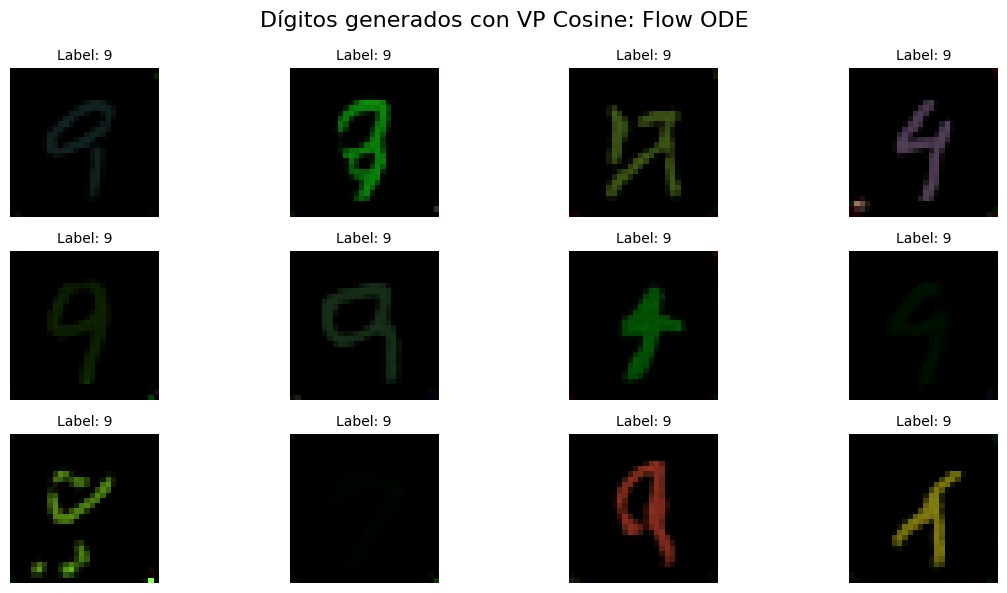

In [44]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_flow_ode, condition = diffusion_model_vp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_flow_ode, title="Dígitos generados con VP Cosine: Flow ODE", labels=condition)

### Exponential Integrator

In [45]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-10 23:24:59,781 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [46]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_exponential.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-10 23:24:59,824 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-10 23:24:59,828 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:24:59,830 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:24:59,839 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:24:59,842 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:24:59,854 — DiffusionModel — INFO — Generando 12 muestras con 3000 pasos


Generando imágenes del dígito 3...


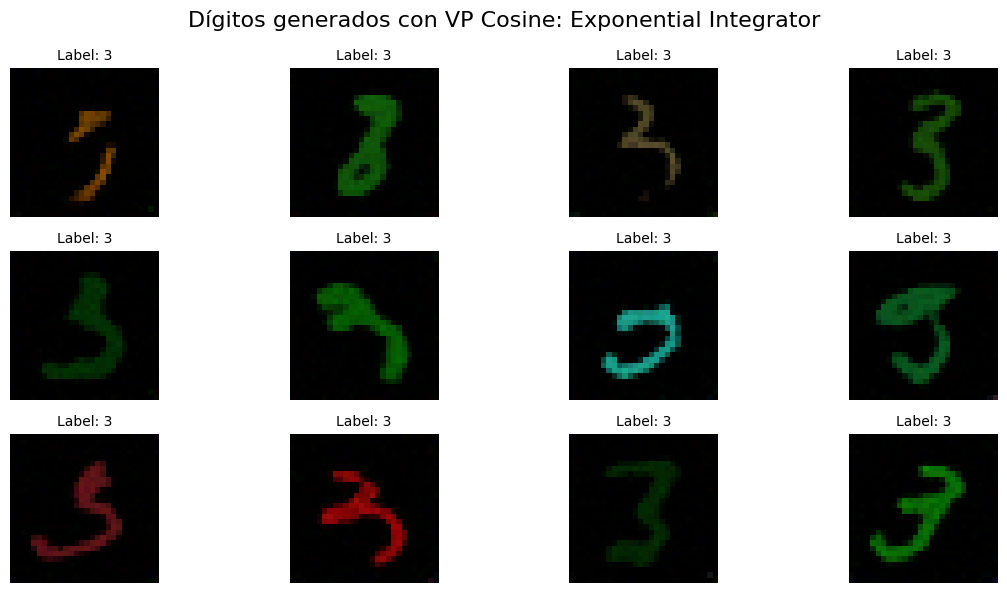

In [47]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 3000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_exponential, condition = diffusion_model_vp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_exponential, title="Dígitos generados con VP Cosine: Exponential Integrator", labels=condition)

---
## SubVP - Linear

In [48]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-10 23:25:25,562 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [49]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [50]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_score': 1.22},
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-10 23:25:25,609 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [51]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_euler.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-10 23:25:25,617 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-10 23:25:25,647 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:25:25,647 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:25:25,655 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:25:25,658 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:25:25,669 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 0...


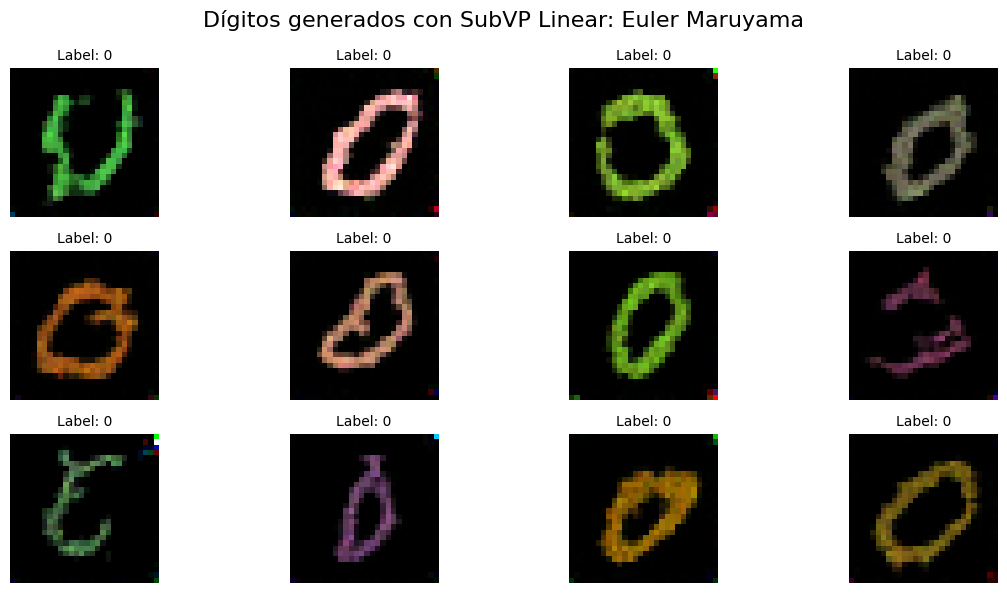

In [52]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_euler, condition = diffusion_model_subvp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_euler, title="Dígitos generados con SubVP Linear: Euler Maruyama", labels=condition)

### Predictor - Corrector

In [53]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-10 23:25:42,345 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [54]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_predictor.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-10 23:25:42,384 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-10 23:25:42,388 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:25:42,389 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:25:42,405 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:25:42,407 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:25:42,419 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 7...


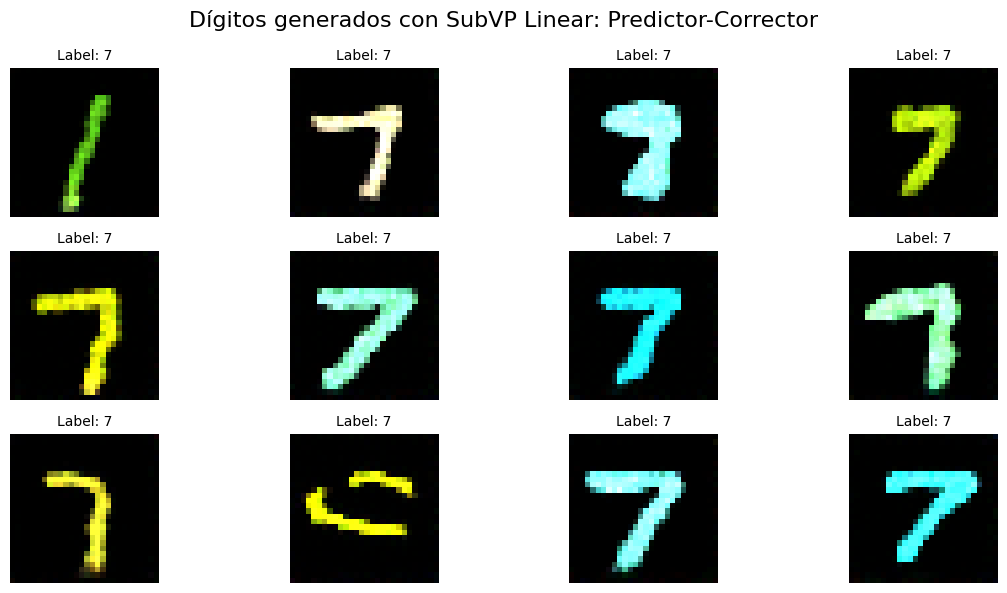

In [55]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_predictor, condition = diffusion_model_subvp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_predictor, title="Dígitos generados con SubVP Linear: Predictor-Corrector", labels=condition)

### Flow ODE

In [56]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.05},
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-10 23:29:27,806 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [57]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_flow_ode.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-10 23:29:27,841 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-10 23:29:27,845 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:29:27,846 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:29:27,858 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:29:27,860 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:29:27,872 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 0...


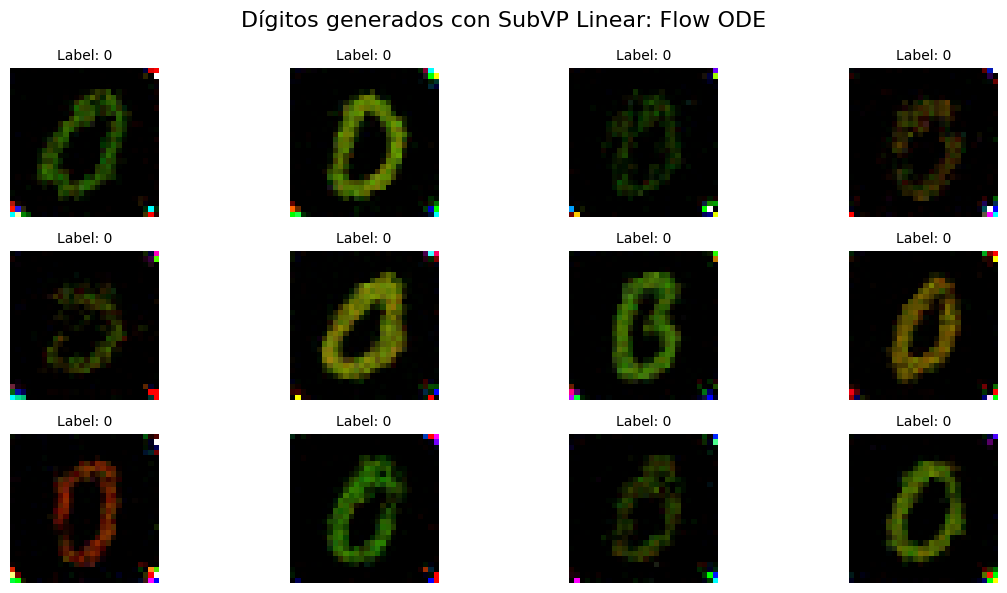

In [58]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_flow_ode, condition = diffusion_model_subvp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_flow_ode, title="Dígitos generados con SubVP Linear: Flow ODE", labels=condition)

### Exponential Integrator

In [59]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-10 23:30:07,432 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [60]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_exponential.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-10 23:30:07,466 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-10 23:30:07,471 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:30:07,472 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:30:07,483 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:30:07,486 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:30:07,495 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 4...


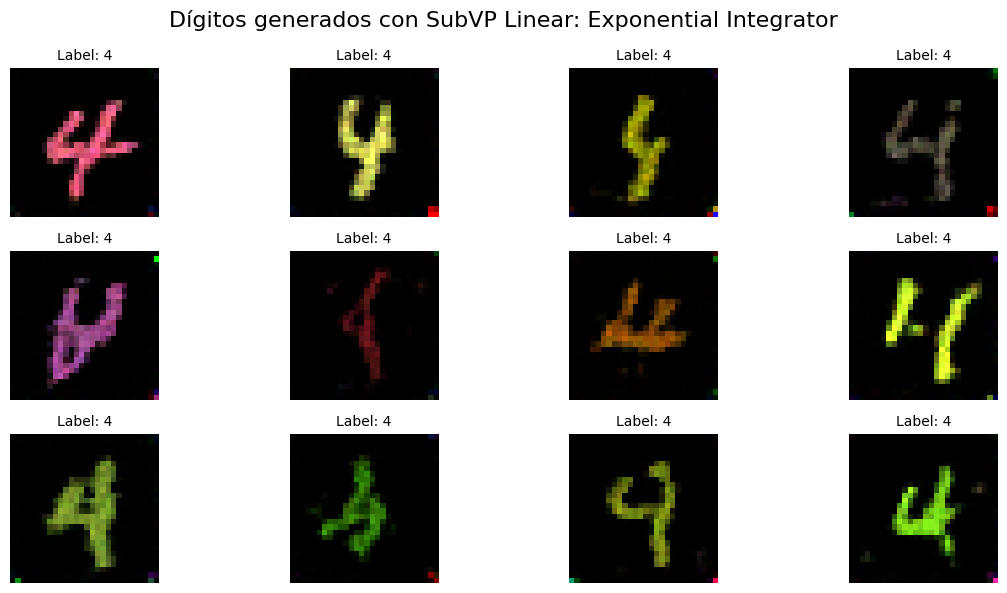

In [61]:
DIGIT_CLASS = 4

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_exponential, condition = diffusion_model_subvp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_exponential, title="Dígitos generados con SubVP Linear: Exponential Integrator", labels=condition)

---
## SubVP - Cosine

In [62]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-10 23:30:28,786 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [63]:
# N_EPOCHS = 38
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [64]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.52, 'coef_score': 1.32},
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-10 23:30:28,820 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [65]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_euler.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:30:28,828 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:30:28,854 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:30:28,855 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:30:28,865 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:30:28,867 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:30:28,876 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 1...


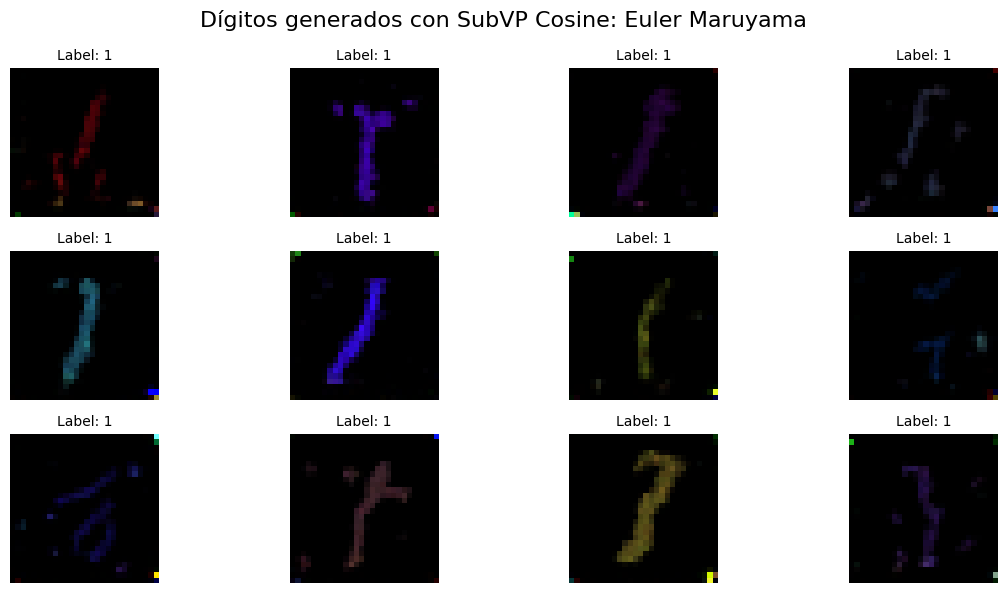

In [66]:
DIGIT_CLASS = 1

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_euler, condition = diffusion_model_subvp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_euler, title="Dígitos generados con SubVP Cosine: Euler Maruyama", labels=condition)

### Predictor - corrector

In [67]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_score': 1.05},
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-10 23:30:45,681 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [68]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_predictor.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:30:45,716 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:30:45,719 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:30:45,720 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:30:45,730 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:30:45,733 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:30:45,742 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


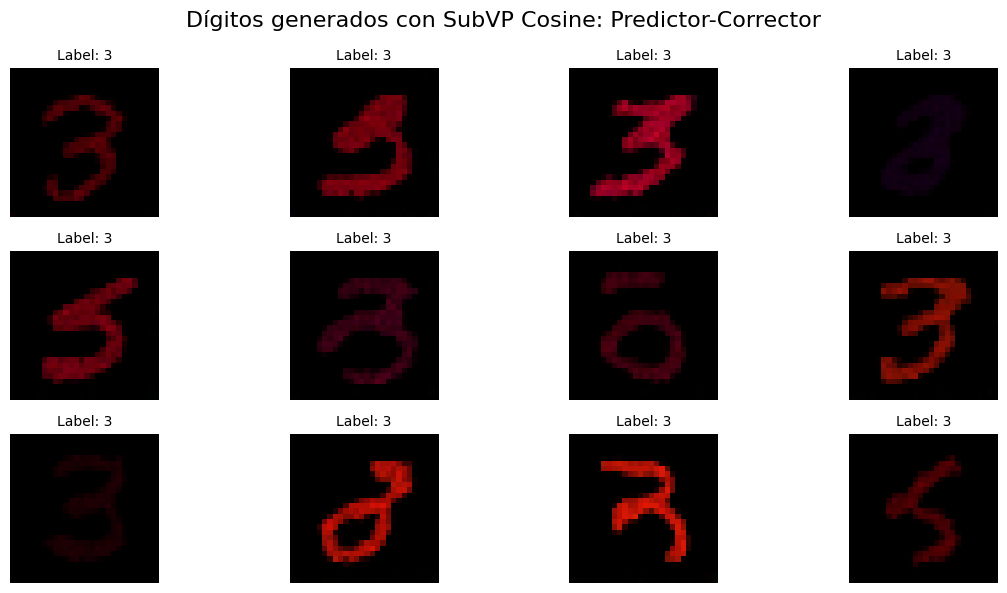

In [69]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_predictor, condition = diffusion_model_subvp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_predictor, title="Dígitos generados con SubVP Cosine: Predictor-Corrector", labels=condition)

### Flow ODE

In [70]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.58, 'coef_score': 1.46},
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-10 23:33:40,046 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [71]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:33:40,090 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:33:40,097 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:33:40,098 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint


2025-05-10 23:33:40,111 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:33:40,115 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:33:40,126 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


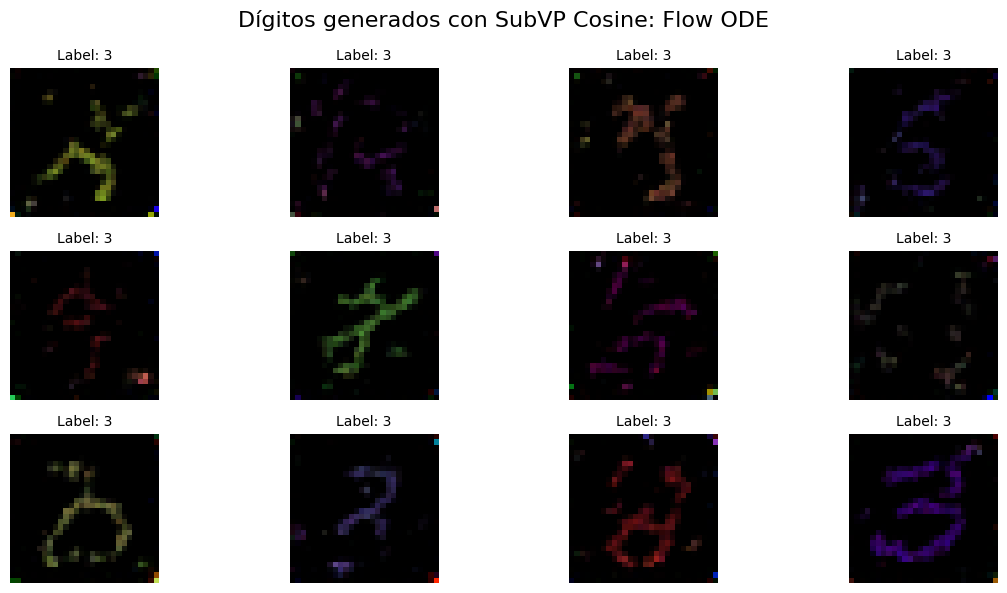

In [72]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_flow_ode, title="Dígitos generados con SubVP Cosine: Flow ODE", labels=condition)

### Exponential Integrator

In [73]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.65, 'coef_score': 1.42},
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-10 23:34:10,598 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [74]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:34:10,632 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:34:10,638 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:34:10,639 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:34:10,651 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:34:10,654 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:34:10,665 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 9...


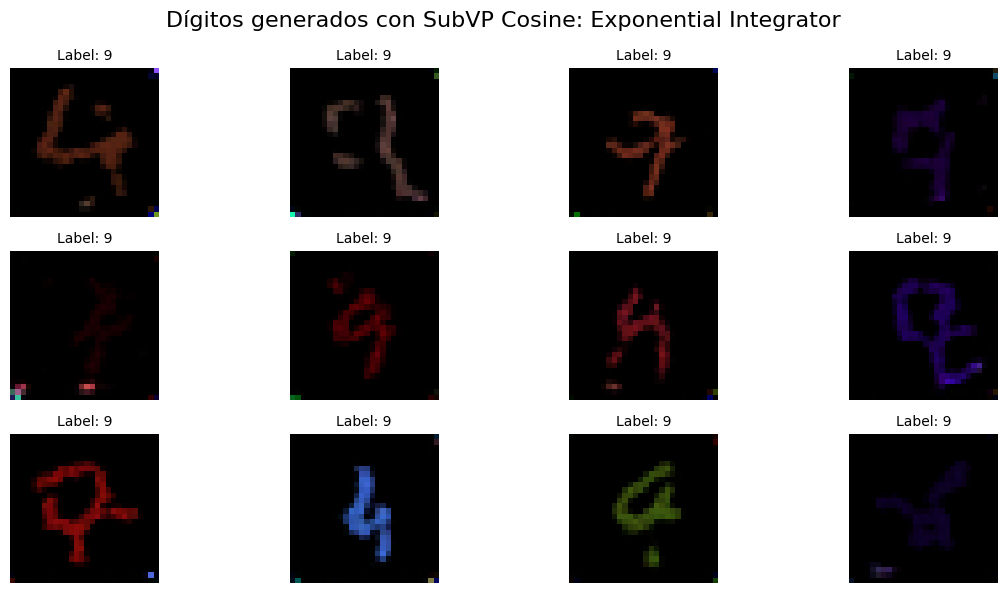

In [75]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_exponential, condition = diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_exponential, title="Dígitos generados con SubVP Cosine: Exponential Integrator", labels=condition)

---
# Imputation

In [76]:
N_SAMPLES = 8

## VE - Flow ODE

In [77]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name='probability_flow_ode',
)

2025-05-10 23:34:31,586 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [78]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_flow_ode_imputation.load_score_model("../checkpoints/ve_sde.pt")

2025-05-10 23:34:31,595 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-10 23:34:31,601 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:34:31,602 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:34:31,614 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:34:31,617 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:34:31,638 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


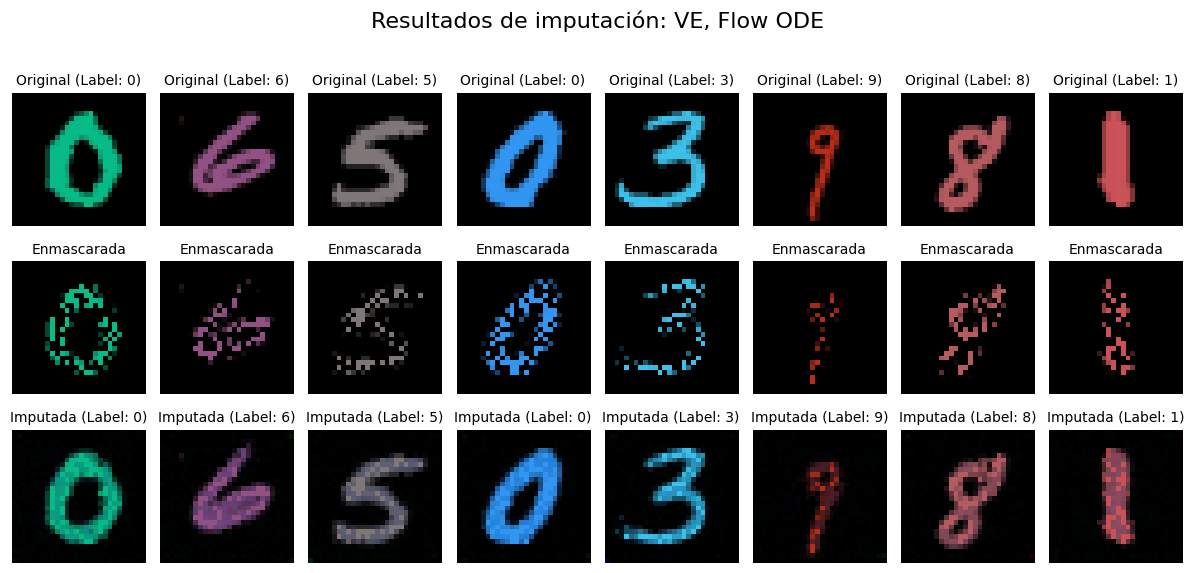

In [79]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels= diffusion_model_ve_flow_ode_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VE, Flow ODE", original_labels=labels, imputed_labels=labels)

## VP Linear - Exponencial Integrator

In [80]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential_integrator_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-10 23:34:38,517 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [81]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_exponential_integrator_imputation.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-10 23:34:38,546 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-10 23:34:38,554 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:34:38,554 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:34:38,566 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:34:38,569 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:34:38,589 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


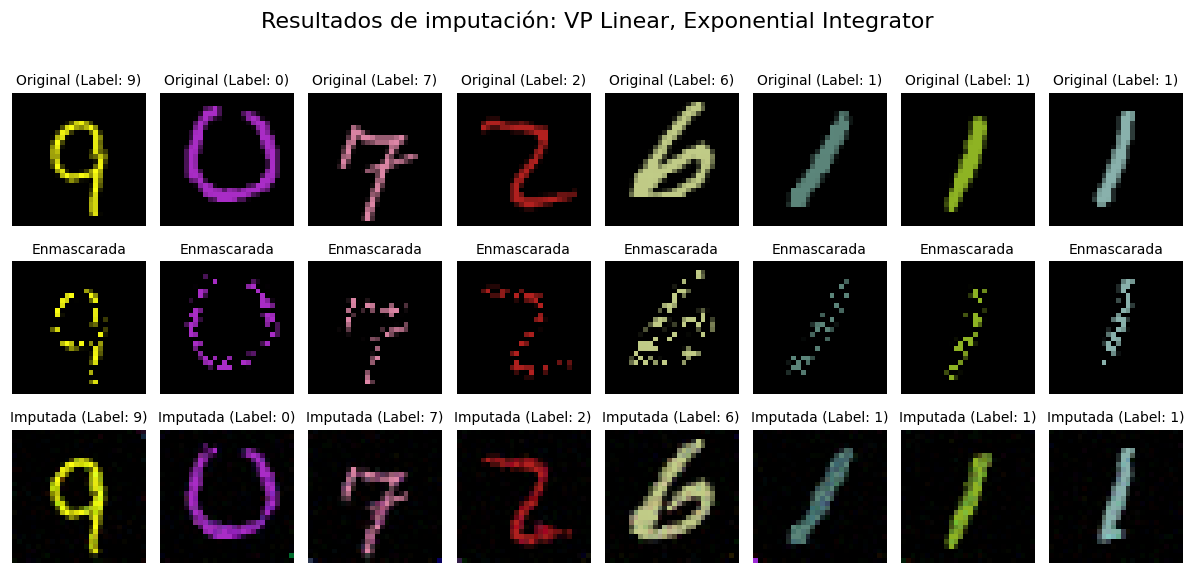

In [82]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels = diffusion_model_vp_linear_exponential_integrator_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VP Linear, Exponential Integrator", original_labels=labels, imputed_labels=labels)

## VP Cosine - Predictor Corrector

In [83]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor_corrector_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-10 23:34:42,468 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu


Configurando el modelo de difusión...


In [84]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_predictor_corrector_imputation.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-10 23:34:42,503 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-10 23:34:42,508 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:34:42,510 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:34:42,520 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:34:42,523 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-10 23:34:42,544 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


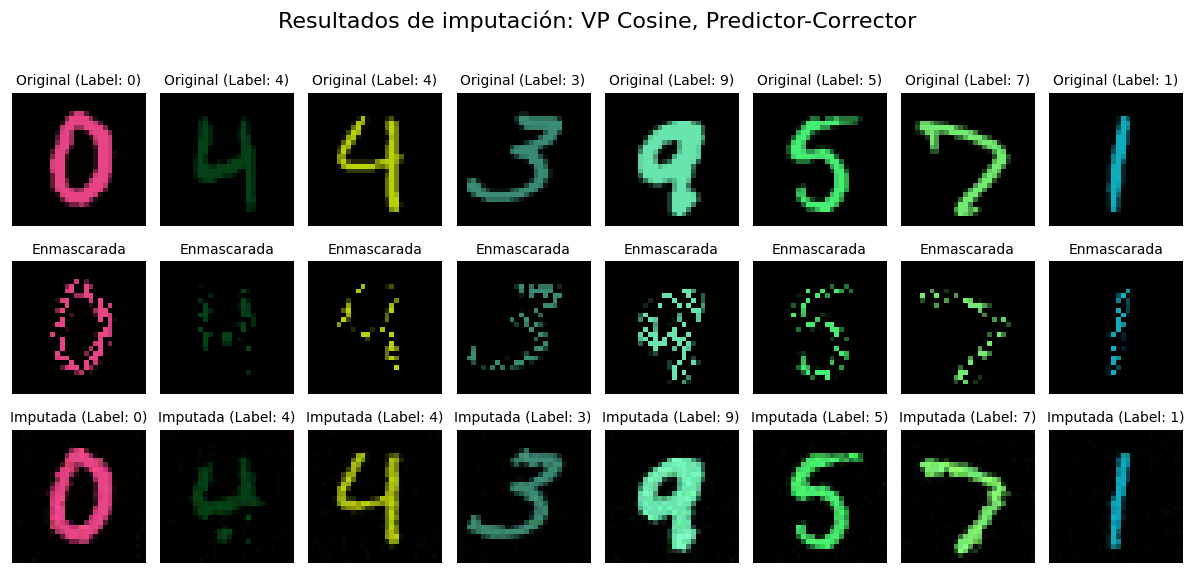

In [85]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels = diffusion_model_vp_cosine_predictor_corrector_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VP Cosine, Predictor-Corrector", original_labels=labels, imputed_labels=labels)

---
# Comparativa Hiperparámetros

## SubVP Cosine - Exponential Integrator

In [86]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:35:18,086 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu
2025-05-10 23:35:18,089 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:35:18,094 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:35:18,095 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:35:18,113 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:35:18,118 — DiffusionModel — INFO — Modelo cargado correctamente


Configurando el modelo de difusión...


In [45]:
import numpy as np
array_imagenes = np.zeros(12)

# Sin hiperparámetros ajustados

DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 6
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

# Generar imágenes
generated_images_subvp_cosine_exponential_no, condition= diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

metricas_no_hiperparametros = diffusion_model_subvp_cosine_exponential.evaluate(
    generated_samples=generated_images_subvp_cosine_exponential_no,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_no_hiperparametros['fid']:.4f} (menor es mejor)")

###### Modelo 2

print("Configurando el modelo de difusión2...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
    sde_kwargs={'coef_beta':0.65, 'coef_score':1.41}
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

# Generar imágenes
generated_images_subvp_cosine_exponential_si, condition= diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

metricas_hiperparametros = diffusion_model_subvp_cosine_exponential.evaluate(
    generated_samples=generated_images_subvp_cosine_exponential_si,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

2025-05-11 09:54:56,723 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 09:54:56,726 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt


Configurando el modelo de difusión...


2025-05-11 09:54:58,010 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 09:54:58,011 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 09:54:58,041 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 09:54:58,044 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 09:54:58,046 — DiffusionModel — INFO — Generando 6 muestras con 2000 pasos
2025-05-11 09:55:13,850 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 09:55:13,874 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-11 09:55:21,743 — DiffusionModel — INFO — FID: 273.5738 (menor es mejor)
2025-05-11 09:55:21,745 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 09:55:21,746 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-11 09:55:21,789 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 09:55:21,790 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 09:55:21,815 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 09:55:21,818 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 09:55:21,819 — DiffusionModel — INFO — Generando 6 muestras con 2000 pasos



Resultados de calidad:
FID: 273.5738 (menor es mejor)
Configurando el modelo de difusión2...


2025-05-11 09:55:37,875 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 09:55:37,899 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-11 09:55:45,785 — DiffusionModel — INFO — FID: 186.7082 (menor es mejor)



Resultados de calidad:
FID: 186.7082 (menor es mejor)


In [46]:
resultado_final1 = torch.cat((generated_images_subvp_cosine_exponential_no[0:2], generated_images_subvp_cosine_exponential_si[0:2]), dim = 0)
resultado_final2 = torch.cat((generated_images_subvp_cosine_exponential_no[2:4], generated_images_subvp_cosine_exponential_si[2:4]), dim = 0)
resultado_final3 = torch.cat((generated_images_subvp_cosine_exponential_no[4:6], generated_images_subvp_cosine_exponential_si[4:6]), dim = 0)
resultado_final1_1 = torch.cat((resultado_final1, resultado_final2), dim = 0)
resultado_final = torch.cat((resultado_final1_1, resultado_final3), dim = 0)

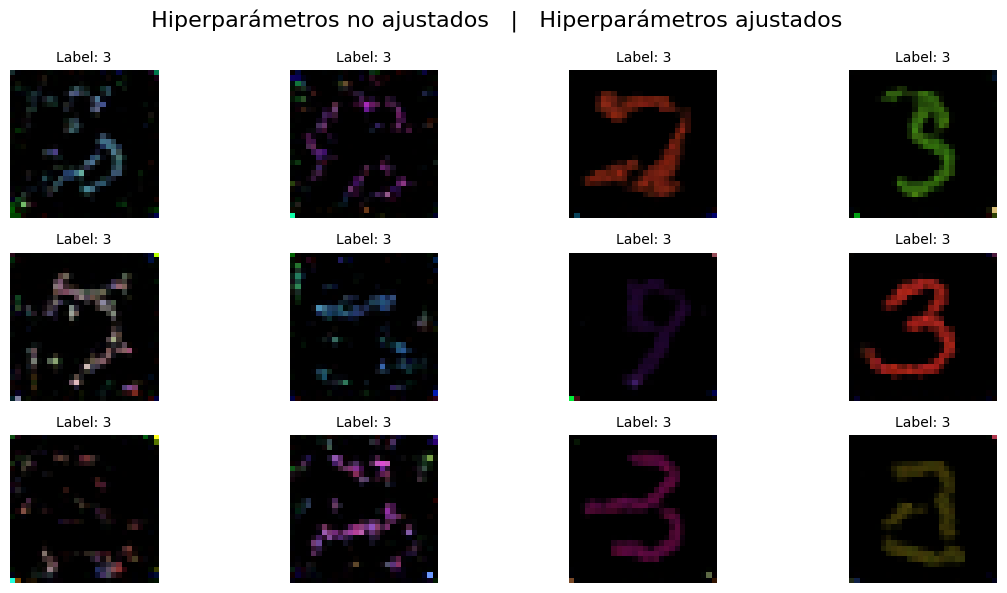

In [47]:
condition = [DIGIT_CLASS]*(2*N_SAMPLES)
show_images(resultado_final, 
    title=" Hiperparámetros no ajustados   |   Hiperparámetros ajustados   ", labels=condition)

2025-05-10 23:40:13,128 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 9...


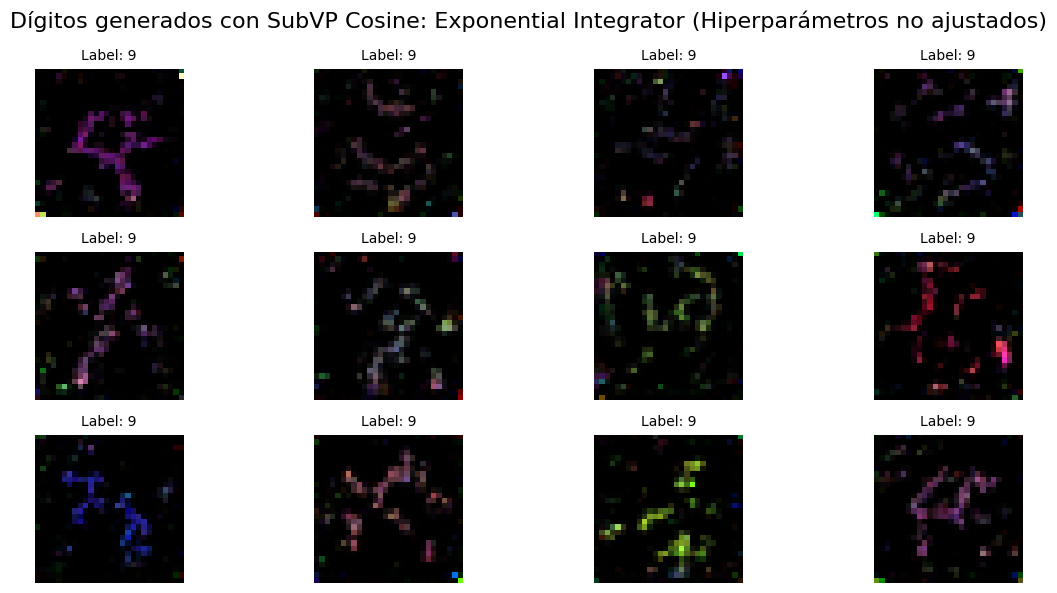

2025-05-10 23:40:35,624 — DiffusionModel — INFO — Recopilando imágenes reales para comparación
Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]
2025-05-10 23:40:35,636 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...
Extract Inception features: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]
2025-05-10 23:40:44,626 — DiffusionModel — INFO — FID: 276.3390 (menor es mejor)
2025-05-10 23:40:44,627 — DiffusionModel — INFO — Calculando IS (Inception Score)...
Inception Score: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-05-10 23:40:45,430 — DiffusionModel — INFO — Inception Score: 1.0000 (mayor es mejor)
2025-05-10 23:40:45,430 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...
BPD: 100%|██████████| 1/1 [00:00<00:00, 46.19it/s]
2025-05-10 23:40:45,454 — DiffusionModel — INFO — BPD: 8.2582 (menor es mejor)



Resultados de calidad:
FID: 276.3390 (menor es mejor)


In [ ]:
# Sin hiperparámetros ajustados

DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_exponential, condition= diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

show_images(generated_images_subvp_cosine_exponential, 
    title="Dígitos generados con SubVP Cosine: Exponential Integrator (Hiperparámetros no ajustados)", labels=condition)

metricas_no_hiperparametros = diffusion_model_subvp_cosine_exponential.evaluate(
    generated_samples=generated_images_subvp_cosine_exponential,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_no_hiperparametros['fid']:.4f} (menor es mejor)")

In [92]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
    sde_kwargs={'coef_beta':0.65, 'coef_score':1.41}
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:40:45,483 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu
2025-05-10 23:40:45,485 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:40:45,489 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:40:45,489 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:40:45,500 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:40:45,502 — DiffusionModel — INFO — Modelo cargado correctamente


Configurando el modelo de difusión...


2025-05-10 23:41:06,099 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 9...


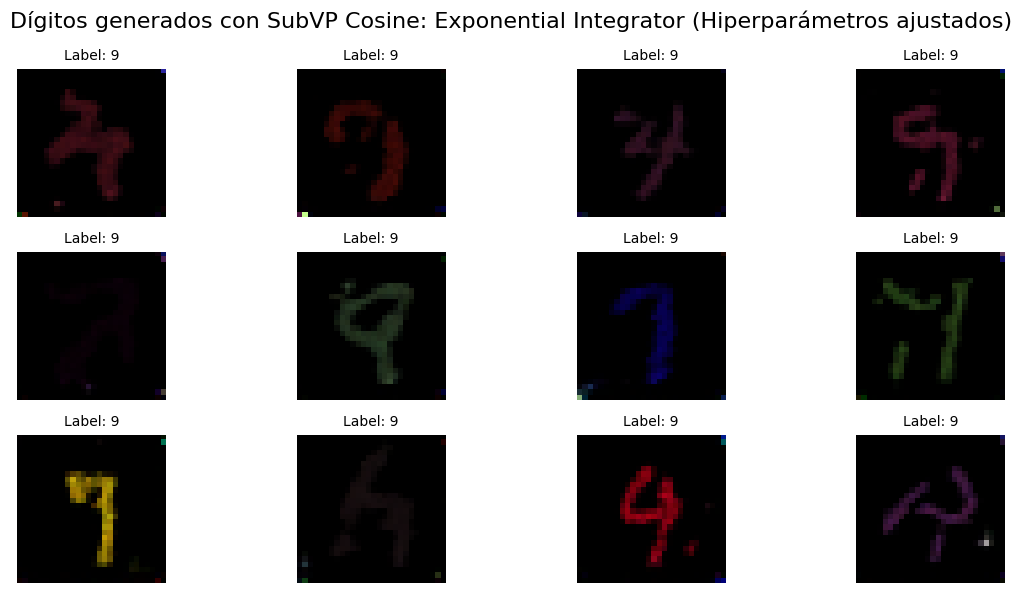

2025-05-10 23:41:28,215 — DiffusionModel — INFO — Recopilando imágenes reales para comparación
Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]
2025-05-10 23:41:28,247 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...
Extract Inception features: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-05-10 23:41:35,806 — DiffusionModel — INFO — FID: 175.6573 (menor es mejor)
2025-05-10 23:41:35,807 — DiffusionModel — INFO — Calculando IS (Inception Score)...
Inception Score: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]
2025-05-10 23:41:36,632 — DiffusionModel — INFO — Inception Score: 1.0000 (mayor es mejor)
2025-05-10 23:41:36,633 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...
BPD: 100%|██████████| 1/1 [00:00<00:00, 49.22it/s]
2025-05-10 23:41:36,656 — DiffusionModel — INFO — BPD: 12.6229 (menor es mejor)



Resultados de calidad:
FID: 175.6573 (menor es mejor)


In [ ]:
# Con hiperparámetros ajustados

DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_exponential, condition= diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

show_images(generated_images_subvp_cosine_exponential, 
    title="Dígitos generados con SubVP Cosine: Exponential Integrator (Hiperparámetros ajustados)", labels=condition)

metricas_hiperparametros = diffusion_model_subvp_cosine_exponential.evaluate(
    generated_samples=generated_images_subvp_cosine_exponential,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

## SubVP Cosine Flow ODE

In [39]:
import numpy as np
array_imagenes = np.zeros(12)

# Sin hiperparámetros ajustados

DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 6
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")


print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode_no, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

metricas_hiperparametros = diffusion_model_subvp_cosine_flow_ode.evaluate(
    generated_samples=generated_images_subvp_cosine_flow_ode_no,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
    sde_kwargs={'coef_beta':0.58, 'coef_score':1.46}
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode_si, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)

metricas_hiperparametros = diffusion_model_subvp_cosine_flow_ode.evaluate(
    generated_samples=generated_images_subvp_cosine_flow_ode_si,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

2025-05-11 09:51:59,155 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 09:51:59,156 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-11 09:51:59,207 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 09:51:59,208 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 09:51:59,233 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 09:51:59,236 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 09:51:59,238 — DiffusionModel — INFO — Generando 6 muestras con 2000 pasos


Configurando el modelo de difusión...
Generando imágenes del dígito 3...


2025-05-11 09:52:24,131 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 09:52:24,158 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-11 09:52:32,008 — DiffusionModel — INFO — FID: 338.9528 (menor es mejor)
2025-05-11 09:52:32,010 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 09:52:32,011 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-11 09:52:32,046 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 09:52:32,047 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 09:52:32,071 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 09:52:32,073 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 09:52:32,075 — DiffusionModel — INFO — Generando 6 muestras con 2000 pasos



Resultados de calidad:
FID: 338.9528 (menor es mejor)
Configurando el modelo de difusión...
Generando imágenes del dígito 3...


2025-05-11 09:52:56,556 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 09:52:56,585 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-11 09:53:04,091 — DiffusionModel — INFO — FID: 211.0881 (menor es mejor)



Resultados de calidad:
FID: 211.0881 (menor es mejor)


In [40]:
resultado_final1 = torch.cat((generated_images_subvp_cosine_flow_ode_no[0:2], generated_images_subvp_cosine_flow_ode_si[0:2]), dim = 0)
resultado_final2 = torch.cat((generated_images_subvp_cosine_flow_ode_no[2:4], generated_images_subvp_cosine_flow_ode_si[2:4]), dim = 0)
resultado_final3 = torch.cat((generated_images_subvp_cosine_flow_ode_no[4:6], generated_images_subvp_cosine_flow_ode_si[4:6]), dim = 0)
resultado_final1_1 = torch.cat((resultado_final1, resultado_final2), dim = 0)
resultado_final = torch.cat((resultado_final1_1, resultado_final3), dim = 0)

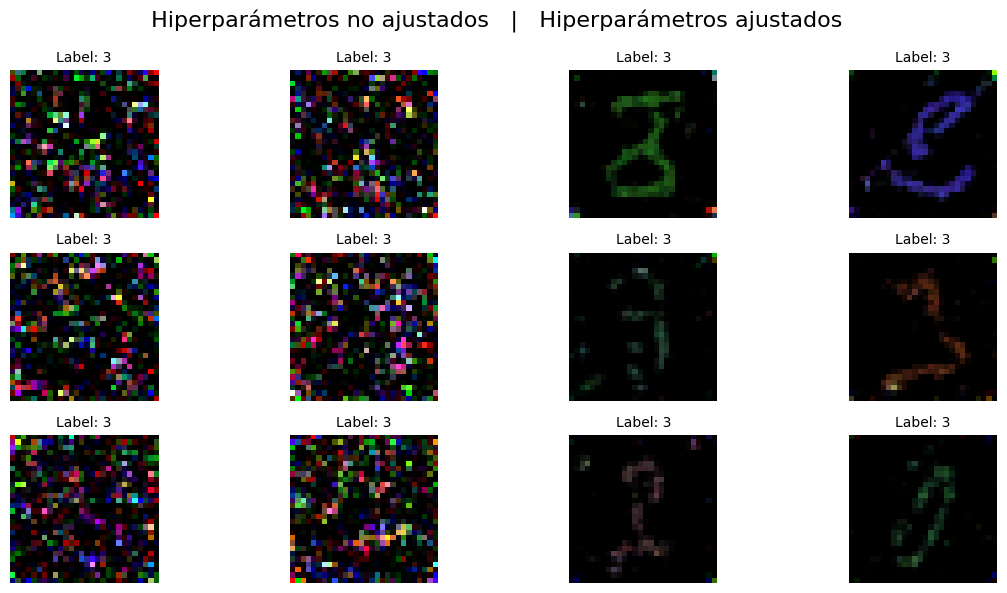

In [41]:
condition = [DIGIT_CLASS]*(2*N_SAMPLES)
show_images(resultado_final, 
    title=" Hiperparámetros no ajustados   |   Hiperparámetros ajustados   ", labels=condition)

In [95]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:41:36,665 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu
2025-05-10 23:41:36,666 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:41:36,671 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:41:36,672 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:41:36,685 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:41:36,687 — DiffusionModel — INFO — Modelo cargado correctamente


Configurando el modelo de difusión...


2025-05-10 23:41:36,710 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


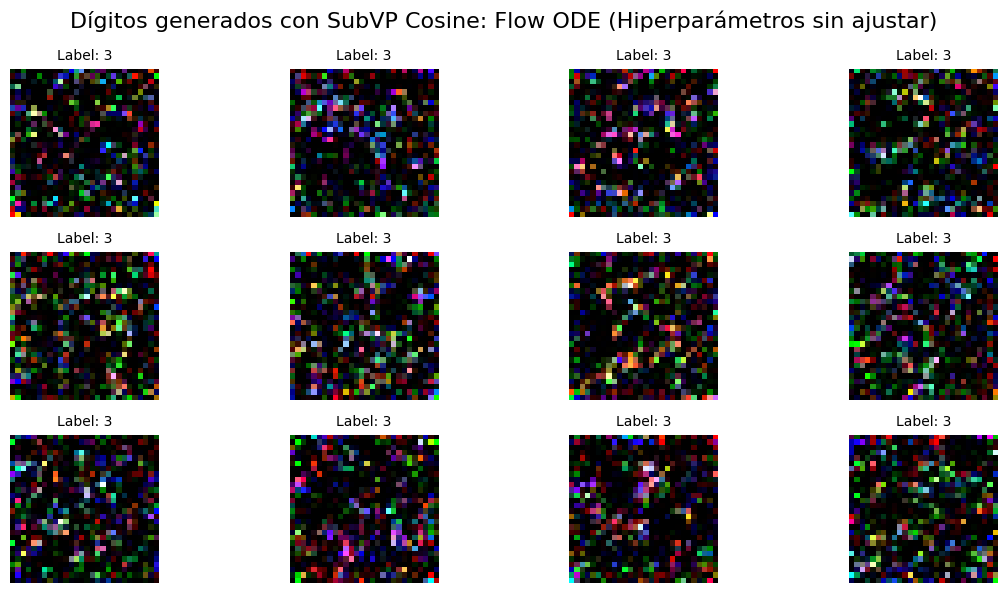

2025-05-10 23:42:09,303 — DiffusionModel — INFO — Recopilando imágenes reales para comparación
Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]
2025-05-10 23:42:09,334 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...
Extract Inception features: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]
2025-05-10 23:42:16,525 — DiffusionModel — INFO — FID: 310.5046 (menor es mejor)



Resultados de calidad:
FID: 310.5046 (menor es mejor)


In [96]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_flow_ode, 
    title="Dígitos generados con SubVP Cosine: Flow ODE (Hiperparámetros sin ajustar)", labels=condition)

metricas_hiperparametros = diffusion_model_subvp_cosine_flow_ode.evaluate(
    generated_samples=generated_images_subvp_cosine_flow_ode,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

In [97]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
    sde_kwargs={'coef_beta':0.58, 'coef_score':1.46}
)

# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-10 23:42:16,537 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu
2025-05-10 23:42:16,539 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-10 23:42:16,547 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-10 23:42:16,548 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-10 23:42:16,566 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-10 23:42:16,569 — DiffusionModel — INFO — Modelo cargado correctamente


Configurando el modelo de difusión...


2025-05-10 23:42:16,580 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


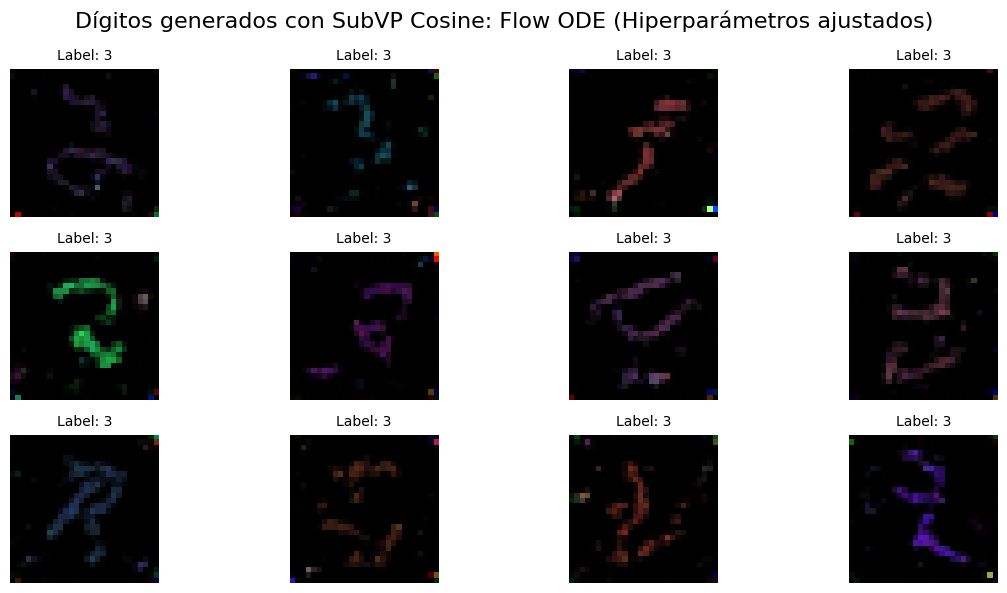

2025-05-10 23:42:49,706 — DiffusionModel — INFO — Recopilando imágenes reales para comparación
Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]
2025-05-10 23:42:49,739 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...
Extract Inception features: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
2025-05-10 23:42:57,129 — DiffusionModel — INFO — FID: 253.4739 (menor es mejor)



Resultados de calidad:
FID: 253.4739 (menor es mejor)


In [98]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS, # return_sequence = True para todo el proceso
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_flow_ode, 
    title="Dígitos generados con SubVP Cosine: Flow ODE (Hiperparámetros ajustados)", labels=condition)

metricas_hiperparametros = diffusion_model_subvp_cosine_flow_ode.evaluate(
    generated_samples=generated_images_subvp_cosine_flow_ode,
    real_dataloader=train_dataloader,
    metrics=["fid"],
    batch_size=BATCH_SIZE,
)
print("\nResultados de calidad:")
print(f"FID: {metricas_hiperparametros['fid']:.4f} (menor es mejor)")

---
# Comparación métricas según número de épocas entrenamiento

## VE

In [48]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-11 10:01:42,956 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


2025-05-11 10:01:43,315 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:01:43,316 — DiffusionModel — INFO — Iniciando entrenamiento por 50 epochs


Entrenando el modelo por 50 epochs...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:02:19,248 — DiffusionModel — INFO — Epoch 1/50, Loss: 191.493827


Epoch 1, Loss: 191.493827


Epoch 2/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:02:50,919 — DiffusionModel — INFO — Epoch 2/50, Loss: 68.243618


Epoch 2, Loss: 68.243618


Epoch 3/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:03:20,570 — DiffusionModel — INFO — Epoch 3/50, Loss: 56.092863


Epoch 3, Loss: 56.092863


Epoch 4/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:03:50,266 — DiffusionModel — INFO — Epoch 4/50, Loss: 48.362448


Epoch 4, Loss: 48.362448


Epoch 5/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:04:19,937 — DiffusionModel — INFO — Epoch 5/50, Loss: 44.334034
2025-05-11 10:04:20,000 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_5.pt


Epoch 5, Loss: 44.334034


Epoch 6/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:04:49,677 — DiffusionModel — INFO — Epoch 6/50, Loss: 41.371087


Epoch 6, Loss: 41.371087


Epoch 7/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:05:19,285 — DiffusionModel — INFO — Epoch 7/50, Loss: 38.794575


Epoch 7, Loss: 38.794575


Epoch 8/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:05:51,840 — DiffusionModel — INFO — Epoch 8/50, Loss: 37.346746


Epoch 8, Loss: 37.346746


Epoch 9/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:06:24,753 — DiffusionModel — INFO — Epoch 9/50, Loss: 36.380513


Epoch 9, Loss: 36.380513


Epoch 10/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:06:57,950 — DiffusionModel — INFO — Epoch 10/50, Loss: 35.361647
2025-05-11 10:06:58,003 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_10.pt


Epoch 10, Loss: 35.361647


Epoch 11/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:07:31,146 — DiffusionModel — INFO — Epoch 11/50, Loss: 34.419354


Epoch 11, Loss: 34.419354


Epoch 12/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:08:00,769 — DiffusionModel — INFO — Epoch 12/50, Loss: 33.966261


Epoch 12, Loss: 33.966261


Epoch 13/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:08:30,441 — DiffusionModel — INFO — Epoch 13/50, Loss: 33.362360


Epoch 13, Loss: 33.362360


Epoch 14/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:09:00,130 — DiffusionModel — INFO — Epoch 14/50, Loss: 32.259214


Epoch 14, Loss: 32.259214


Epoch 15/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:09:29,858 — DiffusionModel — INFO — Epoch 15/50, Loss: 32.043213
2025-05-11 10:09:29,934 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_15.pt


Epoch 15, Loss: 32.043213


Epoch 16/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:09:59,427 — DiffusionModel — INFO — Epoch 16/50, Loss: 31.940842


Epoch 16, Loss: 31.940842


Epoch 17/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:10:28,939 — DiffusionModel — INFO — Epoch 17/50, Loss: 31.275172


Epoch 17, Loss: 31.275172


Epoch 18/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:10:58,643 — DiffusionModel — INFO — Epoch 18/50, Loss: 30.990980


Epoch 18, Loss: 30.990980


Epoch 19/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:11:28,375 — DiffusionModel — INFO — Epoch 19/50, Loss: 30.728299


Epoch 19, Loss: 30.728299


Epoch 20/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:11:57,881 — DiffusionModel — INFO — Epoch 20/50, Loss: 30.095166
2025-05-11 10:11:57,939 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_20.pt


Epoch 20, Loss: 30.095166


Epoch 21/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:12:27,412 — DiffusionModel — INFO — Epoch 21/50, Loss: 29.881794


Epoch 21, Loss: 29.881794


Epoch 22/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:12:57,066 — DiffusionModel — INFO — Epoch 22/50, Loss: 30.107171


Epoch 22, Loss: 30.107171


Epoch 23/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:13:26,741 — DiffusionModel — INFO — Epoch 23/50, Loss: 30.063264


Epoch 23, Loss: 30.063264


Epoch 24/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:13:56,276 — DiffusionModel — INFO — Epoch 24/50, Loss: 29.506251


Epoch 24, Loss: 29.506251


Epoch 25/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:14:25,682 — DiffusionModel — INFO — Epoch 25/50, Loss: 29.075776
2025-05-11 10:14:25,747 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_25.pt


Epoch 25, Loss: 29.075776


Epoch 26/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:14:52,262 — DiffusionModel — INFO — Epoch 26/50, Loss: 29.279006


Epoch 26, Loss: 29.279006


Epoch 27/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:15:14,112 — DiffusionModel — INFO — Epoch 27/50, Loss: 28.634082


Epoch 27, Loss: 28.634082


Epoch 28/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:15:35,962 — DiffusionModel — INFO — Epoch 28/50, Loss: 28.970432


Epoch 28, Loss: 28.970432


Epoch 29/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:15:57,849 — DiffusionModel — INFO — Epoch 29/50, Loss: 28.579649


Epoch 29, Loss: 28.579649


Epoch 30/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:16:20,132 — DiffusionModel — INFO — Epoch 30/50, Loss: 28.481536
2025-05-11 10:16:20,169 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_30.pt


Epoch 30, Loss: 28.481536


Epoch 31/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:16:42,257 — DiffusionModel — INFO — Epoch 31/50, Loss: 28.126905


Epoch 31, Loss: 28.126905


Epoch 32/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:17:04,183 — DiffusionModel — INFO — Epoch 32/50, Loss: 28.135627


Epoch 32, Loss: 28.135627


Epoch 33/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:17:26,178 — DiffusionModel — INFO — Epoch 33/50, Loss: 27.962709


Epoch 33, Loss: 27.962709


Epoch 34/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:17:48,169 — DiffusionModel — INFO — Epoch 34/50, Loss: 27.833009


Epoch 34, Loss: 27.833009


Epoch 35/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:18:10,021 — DiffusionModel — INFO — Epoch 35/50, Loss: 27.766778
2025-05-11 10:18:10,056 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_35.pt


Epoch 35, Loss: 27.766778


Epoch 36/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:18:31,825 — DiffusionModel — INFO — Epoch 36/50, Loss: 27.704544


Epoch 36, Loss: 27.704544


Epoch 37/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:18:53,631 — DiffusionModel — INFO — Epoch 37/50, Loss: 27.514175


Epoch 37, Loss: 27.514175


Epoch 38/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:19:15,411 — DiffusionModel — INFO — Epoch 38/50, Loss: 27.510144


Epoch 38, Loss: 27.510144


Epoch 39/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:19:37,242 — DiffusionModel — INFO — Epoch 39/50, Loss: 27.481744


Epoch 39, Loss: 27.481744


Epoch 40/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:19:59,085 — DiffusionModel — INFO — Epoch 40/50, Loss: 27.023917
2025-05-11 10:19:59,121 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_40.pt


Epoch 40, Loss: 27.023917


Epoch 41/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:20:20,913 — DiffusionModel — INFO — Epoch 41/50, Loss: 27.030900


Epoch 41, Loss: 27.030900


Epoch 42/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:20:42,618 — DiffusionModel — INFO — Epoch 42/50, Loss: 27.243224


Epoch 42, Loss: 27.243224


Epoch 43/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:21:04,465 — DiffusionModel — INFO — Epoch 43/50, Loss: 26.625057


Epoch 43, Loss: 26.625057


Epoch 44/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:21:26,617 — DiffusionModel — INFO — Epoch 44/50, Loss: 26.693212


Epoch 44, Loss: 26.693212


Epoch 45/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:21:48,435 — DiffusionModel — INFO — Epoch 45/50, Loss: 26.841978
2025-05-11 10:21:48,471 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_45.pt


Epoch 45, Loss: 26.841978


Epoch 46/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:22:10,384 — DiffusionModel — INFO — Epoch 46/50, Loss: 26.520825


Epoch 46, Loss: 26.520825


Epoch 47/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:22:32,269 — DiffusionModel — INFO — Epoch 47/50, Loss: 26.473682


Epoch 47, Loss: 26.473682


Epoch 48/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:22:54,060 — DiffusionModel — INFO — Epoch 48/50, Loss: 26.597832


Epoch 48, Loss: 26.597832


Epoch 49/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:23:15,896 — DiffusionModel — INFO — Epoch 49/50, Loss: 26.441001


Epoch 49, Loss: 26.441001


Epoch 50/50:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:23:37,733 — DiffusionModel — INFO — Epoch 50/50, Loss: 26.368005
2025-05-11 10:23:37,765 — DiffusionModel — INFO — Checkpoint guardado en ../checkpoints\ve_sde_checkpoint_epoch_50.pt
2025-05-11 10:23:37,777 — DiffusionModel — INFO — Modelo final guardado en ../checkpoints\ve_sde.pt


Epoch 50, Loss: 26.368005


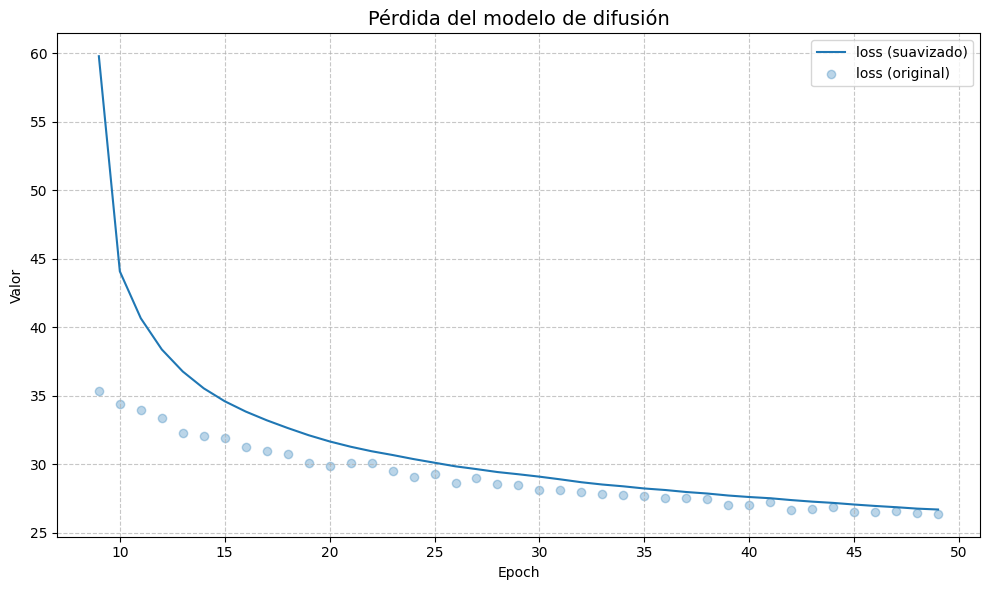

In [49]:
# Entrenar el modelo solo si no ha sido ya entrenado

# Configurar parámetros
BATCH_SIZE = 32
N_EPOCHS = 50
LR = 1e-3
CHECKPOINT_INTERVAL = 5

print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# Función para mostrar el progreso del entrenamiento
def training_callback(model, epoch, history):
    print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# Entrenar el modelo
training_history = diffusion_model_ve.train(
    dataloader=train_dataloader,
    n_epochs=N_EPOCHS,
    lr=LR,
    checkpoint_interval=CHECKPOINT_INTERVAL,
    callback=training_callback,
    model_file_name = "ve_sde"
)
plot_training_history(training_history, title="Pérdida del modelo de difusión")

lista_loss = [training_history["loss"][i] for i in 
    range(CHECKPOINT_INTERVAL-1, len(training_history["loss"]), CHECKPOINT_INTERVAL)] 
# guardamos la pérdida

In [51]:
lista_modelos = []
nombre_modelo = "ve_sde_checkpoint_epoch_"
for i in range(1,10):
    nombre = nombre_modelo + str(CHECKPOINT_INTERVAL*i) + ".pt"
    lista_modelos.append(nombre)

lista_modelos.append("ve_sde.pt")

lista_N_steps = [250] # Poner los n_steps a probar
lista_metricas = []

DIGIT_CLASS = 5
N_SAMPLES = 250
condition = [DIGIT_CLASS]*N_SAMPLES

for N_STEPS in lista_N_steps:
    for modelo in lista_modelos:
        print("Configurando el modelo de difusión...")
        # Crear modelo de difusión utilizando el ModelFactory
        diffusion_model_ve_euler = ModelFactory.create(
            score_model_class=ScoreNet,
            is_conditional=True,
            sde_name='ve_sde',
            sampler_name="euler_maruyama",
        )

        path_modelo = "../checkpoints/"+ modelo
        print(path_modelo)
        diffusion_model_ve_euler.load_score_model(path_modelo)

        print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

        generated_images_ve_euler, condition_used= diffusion_model_ve_euler.generate(
            n_samples=N_SAMPLES,
            condition=condition,
            n_steps=N_STEPS,
        )

        metricas = diffusion_model_ve_euler.evaluate(
        generated_samples=generated_images_ve_euler,
        real_dataloader=train_dataloader,
        metrics=["fid", "is", "bpd"],
        batch_size=BATCH_SIZE,
        )

        lista_metricas.append(metricas)

2025-05-11 10:30:31,661 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:30:31,661 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_5.pt
2025-05-11 10:30:31,711 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:30:31,711 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:30:31,727 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:30:31,729 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:30:31,732 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_5.pt
Generando imágenes del dígito 5...


2025-05-11 10:30:34,342 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:30:34,378 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:39,994 — DiffusionModel — INFO — FID: 125.3426 (menor es mejor)
2025-05-11 10:30:39,995 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:41,009 — DiffusionModel — INFO — Inception Score: 1.5219 (mayor es mejor)
2025-05-11 10:30:41,009 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:30:41,082 — DiffusionModel — INFO — BPD: 2.7240 (menor es mejor)
2025-05-11 10:30:41,095 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:30:41,096 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_10.pt
2025-05-11 10:30:41,153 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:30:41,153 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:30:41,167 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:30:41,170 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:30:41,172 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_10.pt
Generando imágenes del dígito 5...


2025-05-11 10:30:43,634 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:30:43,685 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:49,683 — DiffusionModel — INFO — FID: 133.8032 (menor es mejor)
2025-05-11 10:30:49,684 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:50,790 — DiffusionModel — INFO — Inception Score: 1.5528 (mayor es mejor)
2025-05-11 10:30:50,791 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:30:50,827 — DiffusionModel — INFO — BPD: 2.6237 (menor es mejor)
2025-05-11 10:30:50,840 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:30:50,841 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_15.pt
2025-05-11 10:30:50,889 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:30:50,890 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:30:50,902 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:30:50,904 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:30:50,906 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_15.pt
Generando imágenes del dígito 5...


2025-05-11 10:30:53,258 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:30:53,302 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:58,889 — DiffusionModel — INFO — FID: 138.9722 (menor es mejor)
2025-05-11 10:30:58,890 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:30:59,988 — DiffusionModel — INFO — Inception Score: 1.6020 (mayor es mejor)
2025-05-11 10:30:59,989 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:00,017 — DiffusionModel — INFO — BPD: 3.1323 (menor es mejor)
2025-05-11 10:31:00,031 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:00,032 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_20.pt
2025-05-11 10:31:00,083 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:00,084 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:00,094 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:00,096 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:00,098 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_20.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:02,428 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:02,471 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:07,772 — DiffusionModel — INFO — FID: 134.5523 (menor es mejor)
2025-05-11 10:31:07,773 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:08,800 — DiffusionModel — INFO — Inception Score: 1.6009 (mayor es mejor)
2025-05-11 10:31:08,800 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:08,821 — DiffusionModel — INFO — BPD: 3.1608 (menor es mejor)
2025-05-11 10:31:08,832 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:08,833 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_25.pt
2025-05-11 10:31:08,876 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:08,876 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:08,885 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:08,887 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:08,888 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_25.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:11,168 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:11,203 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:16,606 — DiffusionModel — INFO — FID: 136.0546 (menor es mejor)
2025-05-11 10:31:16,607 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:17,604 — DiffusionModel — INFO — Inception Score: 1.6213 (mayor es mejor)
2025-05-11 10:31:17,605 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:17,626 — DiffusionModel — INFO — BPD: 2.7332 (menor es mejor)
2025-05-11 10:31:17,635 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:17,637 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_30.pt
2025-05-11 10:31:17,683 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:17,684 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:17,691 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:17,693 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:17,694 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_30.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:20,006 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:20,041 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:25,352 — DiffusionModel — INFO — FID: 143.3980 (menor es mejor)
2025-05-11 10:31:25,353 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:26,397 — DiffusionModel — INFO — Inception Score: 1.5276 (mayor es mejor)
2025-05-11 10:31:26,398 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:26,421 — DiffusionModel — INFO — BPD: 2.5221 (menor es mejor)
2025-05-11 10:31:26,433 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:26,435 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_35.pt
2025-05-11 10:31:26,471 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:26,471 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:26,479 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:26,482 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:26,483 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_35.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:28,792 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:28,828 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:34,114 — DiffusionModel — INFO — FID: 137.6525 (menor es mejor)
2025-05-11 10:31:34,115 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:35,179 — DiffusionModel — INFO — Inception Score: 1.6267 (mayor es mejor)
2025-05-11 10:31:35,180 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:35,203 — DiffusionModel — INFO — BPD: 2.4518 (menor es mejor)
2025-05-11 10:31:35,215 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:35,216 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_40.pt
2025-05-11 10:31:35,257 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:35,258 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:35,269 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:35,271 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:35,272 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_40.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:37,569 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:37,608 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:43,055 — DiffusionModel — INFO — FID: 135.6837 (menor es mejor)
2025-05-11 10:31:43,055 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:44,007 — DiffusionModel — INFO — Inception Score: 1.7520 (mayor es mejor)
2025-05-11 10:31:44,007 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:44,030 — DiffusionModel — INFO — BPD: 2.2584 (menor es mejor)
2025-05-11 10:31:44,042 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:44,043 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde_checkpoint_epoch_45.pt
2025-05-11 10:31:44,083 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:44,084 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:44,092 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:44,094 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:44,095 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde_checkpoint_epoch_45.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:46,398 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:46,437 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:51,905 — DiffusionModel — INFO — FID: 164.6375 (menor es mejor)
2025-05-11 10:31:51,906 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:31:52,982 — DiffusionModel — INFO — Inception Score: 1.5401 (mayor es mejor)
2025-05-11 10:31:52,983 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:31:53,010 — DiffusionModel — INFO — BPD: 2.4288 (menor es mejor)
2025-05-11 10:31:53,023 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda
2025-05-11 10:31:53,024 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-11 10:31:53,046 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 10:31:53,047 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 10:31:53,060 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 10:31:53,063 — DiffusionModel — INFO — Modelo cargado correctamente
2025-05-11 10:31:53,064 — DiffusionModel — INFO — Generando 250 muestras con 250 pasos


Configurando el modelo de difusión...
../checkpoints/ve_sde.pt
Generando imágenes del dígito 5...


2025-05-11 10:31:55,366 — DiffusionModel — INFO — Recopilando imágenes reales para comparación


Recopilando imágenes reales:   0%|          | 0/1875 [00:00<?, ?it/s]

2025-05-11 10:31:55,409 — DiffusionModel — INFO — Calculando FID (Fréchet Inception Distance)...


Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

Extract Inception features:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:32:00,964 — DiffusionModel — INFO — FID: 136.8576 (menor es mejor)
2025-05-11 10:32:00,965 — DiffusionModel — INFO — Calculando IS (Inception Score)...


Inception Score:   0%|          | 0/8 [00:00<?, ?it/s]

2025-05-11 10:32:01,992 — DiffusionModel — INFO — Inception Score: 1.7077 (mayor es mejor)
2025-05-11 10:32:01,993 — DiffusionModel — INFO — Calculando BPD (Bits Per Dimension)...


BPD:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-11 10:32:02,023 — DiffusionModel — INFO — BPD: 2.1716 (menor es mejor)


In [52]:
import pandas as pd

df = pd.DataFrame(lista_metricas)

# Añadimos una columna de época (índice de la lista)
df.insert(0, 'época', (df.index + 1)*5)
df["loss"] = lista_loss # df.insert(0, 'loss', lista_loss)

# Mostramos la tabla
print(df.to_string(index=False))

 época        fid       is      bpd      loss
     5 125.342554 1.521904 2.724024 44.334034
    10 133.803187 1.552782 2.623744 35.361647
    15 138.972249 1.601978 3.132272 32.043213
    20 134.552287 1.600858 3.160797 30.095166
    25 136.054623 1.621306 2.733150 29.075776
    30 143.398044 1.527607 2.522136 28.481536
    35 137.652493 1.626705 2.451809 27.766778
    40 135.683686 1.751970 2.258361 27.023917
    45 164.637529 1.540138 2.428812 26.841978
    50 136.857575 1.707701 2.171607 26.368005


In [58]:
df["fid"] = np.array(df["fid"][::-1])

In [60]:
print(df.to_string(index=False))

 época        fid       is      bpd      loss
     5 136.857575 1.521904 2.724024 44.334034
    10 164.637529 1.552782 2.623744 35.361647
    15 135.683686 1.601978 3.132272 32.043213
    20 137.652493 1.600858 3.160797 30.095166
    25 143.398044 1.621306 2.733150 29.075776
    30 136.054623 1.527607 2.522136 28.481536
    35 134.552287 1.626705 2.451809 27.766778
    40 138.972249 1.751970 2.258361 27.023917
    45 133.803187 1.540138 2.428812 26.841978
    50 125.342554 1.707701 2.171607 26.368005


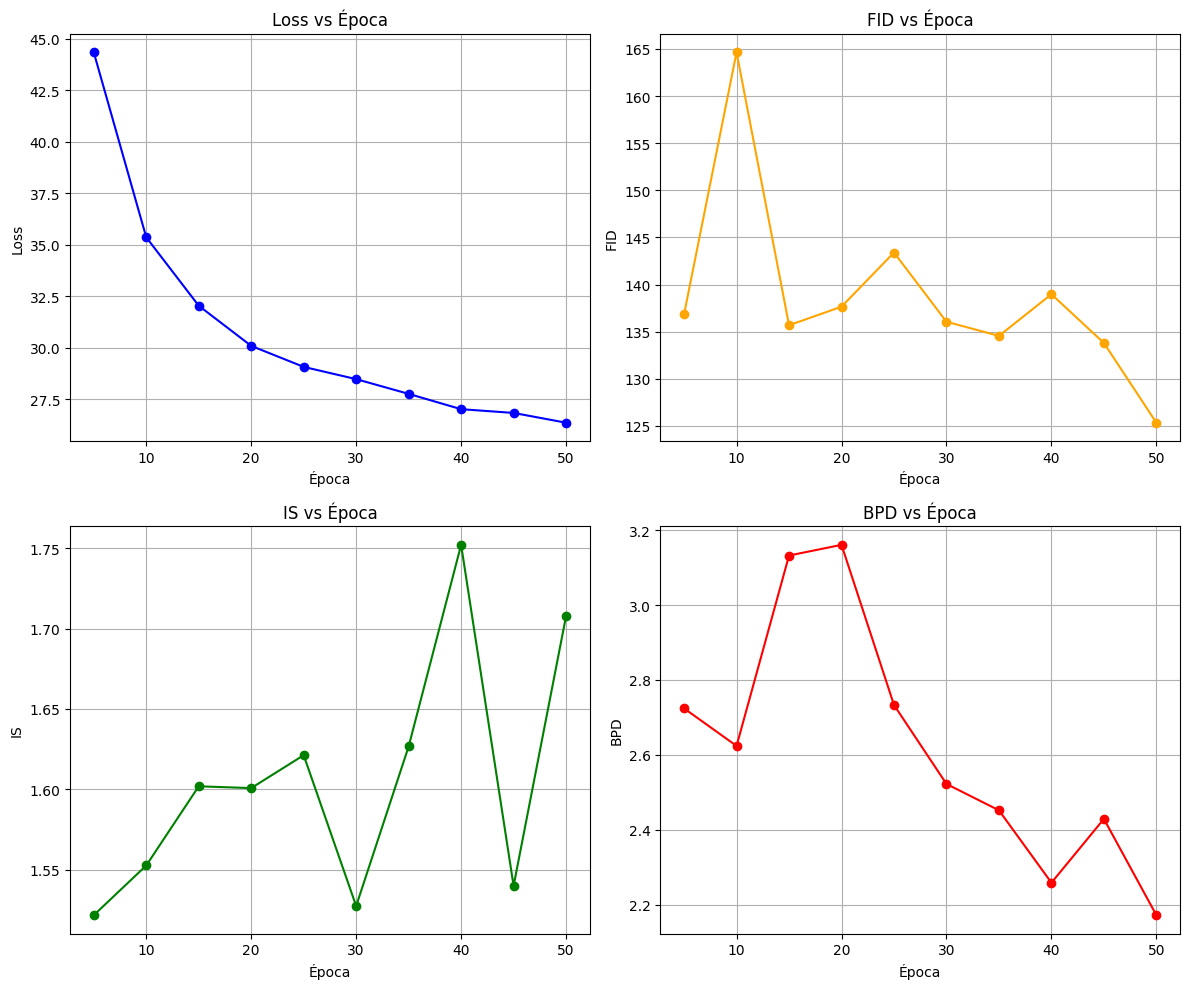

In [59]:
import matplotlib.pyplot as plt

# Crear los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Graficar cada variable en su respectivo subplot
axs[0, 0].plot(df['época'], df['loss'], color='blue', marker='o')
axs[0, 0].set_title('Loss vs Época')
axs[0, 0].set_xlabel('Época')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].grid()

axs[0, 1].plot(df['época'], df['fid'], color='orange', marker='o')
axs[0, 1].set_title('FID vs Época')
axs[0, 1].set_xlabel('Época')
axs[0, 1].set_ylabel('FID')
axs[0, 1].grid()

axs[1, 0].plot(df['época'], df['is'], color='green', marker='o')
axs[1, 0].set_title('IS vs Época')
axs[1, 0].set_xlabel('Época')
axs[1, 0].set_ylabel('IS')
axs[1, 0].grid()

axs[1, 1].plot(df['época'], df['bpd'], color='red', marker='o')
axs[1, 1].set_title('BPD vs Época')
axs[1, 1].set_xlabel('Época')
axs[1, 1].set_ylabel('BPD')
axs[1, 1].grid()

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Pruebas Imputation

Un ejemplo usando VE

In [102]:
N_SAMPLES = 8
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name='probability_flow_ode',
)
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_ve_flow_ode_imputation.load_score_model("../checkpoints/ve_sde.pt")

2025-05-11 00:04:13,977 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cpu
2025-05-11 00:04:13,978 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-11 00:04:13,981 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 00:04:13,982 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 00:04:14,003 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 00:04:14,008 — DiffusionModel — INFO — Modelo cargado correctamente


Configurando el modelo de difusión...


2025-05-11 00:08:59,118 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


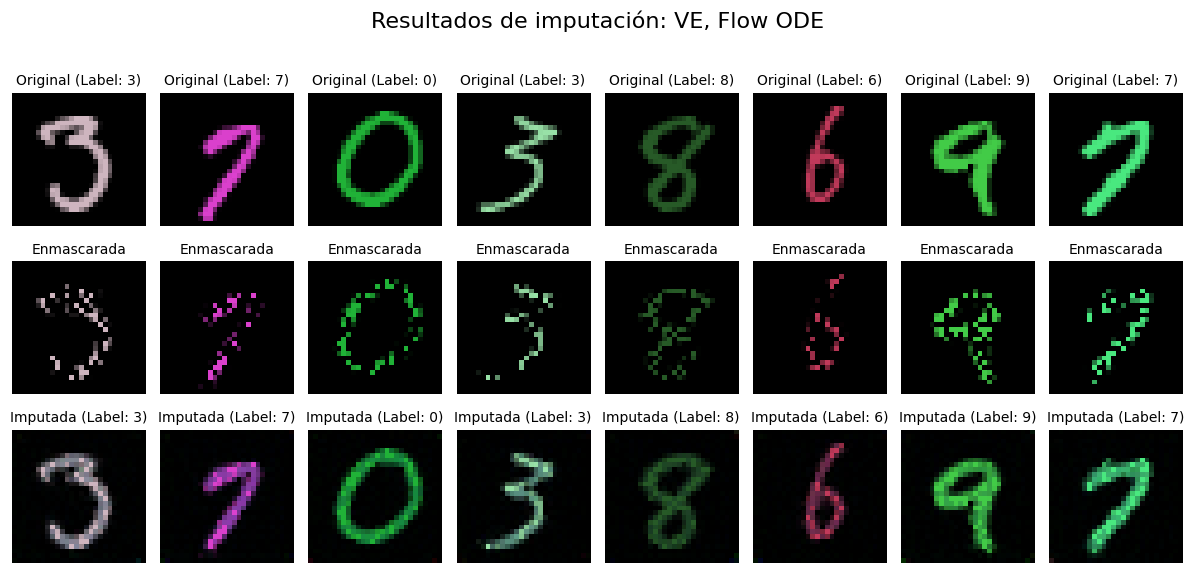

In [ ]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels = diffusion_model_ve_flow_ode_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,
    title = "Resultados de imputación: VE, Flow ODE", original_labels=labels, imputed_labels=labels)

# Visualizar proceso de eliminación de ruido

In [40]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-11 00:28:12,198 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [41]:
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_ve_flow_ode.load_score_model("../checkpoints/ve_sde.pt")

2025-05-11 00:28:13,003 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-11 00:28:14,248 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 00:28:14,249 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 00:28:14,268 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 00:28:14,271 — DiffusionModel — INFO — Modelo cargado correctamente


In [56]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 1
N_STEPS = 1500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
return_sequence1, _ = diffusion_model_ve_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS,
    return_sequence=True
)

2025-05-11 00:30:20,236 — DiffusionModel — INFO — Generando 1 muestras con 1500 pasos


Generando imágenes del dígito 7...


In [43]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-11 00:28:29,184 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [44]:
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_vp_linear_exponential.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-11 00:28:29,217 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-11 00:28:29,228 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 00:28:29,229 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 00:28:29,245 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 00:28:29,248 — DiffusionModel — INFO — Modelo cargado correctamente


In [45]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 1
N_STEPS = 1500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
return_sequence2, condition  = diffusion_model_vp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS,
    return_sequence=True,
)

2025-05-11 00:28:29,260 — DiffusionModel — INFO — Generando 1 muestras con 1500 pasos


Generando imágenes del dígito 7...


In [47]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
)

2025-05-11 00:28:34,985 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [48]:
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_vp_cosine_predictor.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-11 00:28:34,993 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-11 00:28:35,009 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 00:28:35,010 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 00:28:35,021 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 00:28:35,024 — DiffusionModel — INFO — Modelo cargado correctamente


In [49]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 1
N_STEPS = 1500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
return_sequence3 , _ = diffusion_model_vp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS,
    return_sequence=True,
)

2025-05-11 00:28:35,031 — DiffusionModel — INFO — Generando 1 muestras con 1500 pasos


Generando imágenes del dígito 7...


In [50]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
    sde_kwargs={'coef_beta': 0.5, 'coef_score': 1.2},
)

2025-05-11 00:29:28,646 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [51]:
# Cargar un modelo pre-entrenado (asumiendo que ya tienes uno)
diffusion_model_subvp_linear_euler.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-11 00:29:28,680 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-11 00:29:28,693 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-11 00:29:28,694 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-11 00:29:28,709 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-11 00:29:28,711 — DiffusionModel — INFO — Modelo cargado correctamente


In [52]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 1
N_STEPS = 1500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
return_sequence4, _  = diffusion_model_subvp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS,
    return_sequence=True,
)

2025-05-11 00:29:28,719 — DiffusionModel — INFO — Generando 1 muestras con 1500 pasos


Generando imágenes del dígito 7...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.6871574..4.2092285].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9791567..5.255584].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.428842..4.94057].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.5634573..6.378902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.6697056..6.6568675].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2376008..6.554372].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5343767..5.9

a
a
a
a


(<Figure size 1800x800 with 44 Axes>,
 array([[<Axes: title={'left': 'Euler-Maruyama: SubVP-Linear'}>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: title={'left': 'Predictor-Corrector: VP-Cosine'}>,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: title={'left': 'Flow ODE: VE'}>, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: title={'left': 'Exponential Integrator: VP-Linear'}>,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

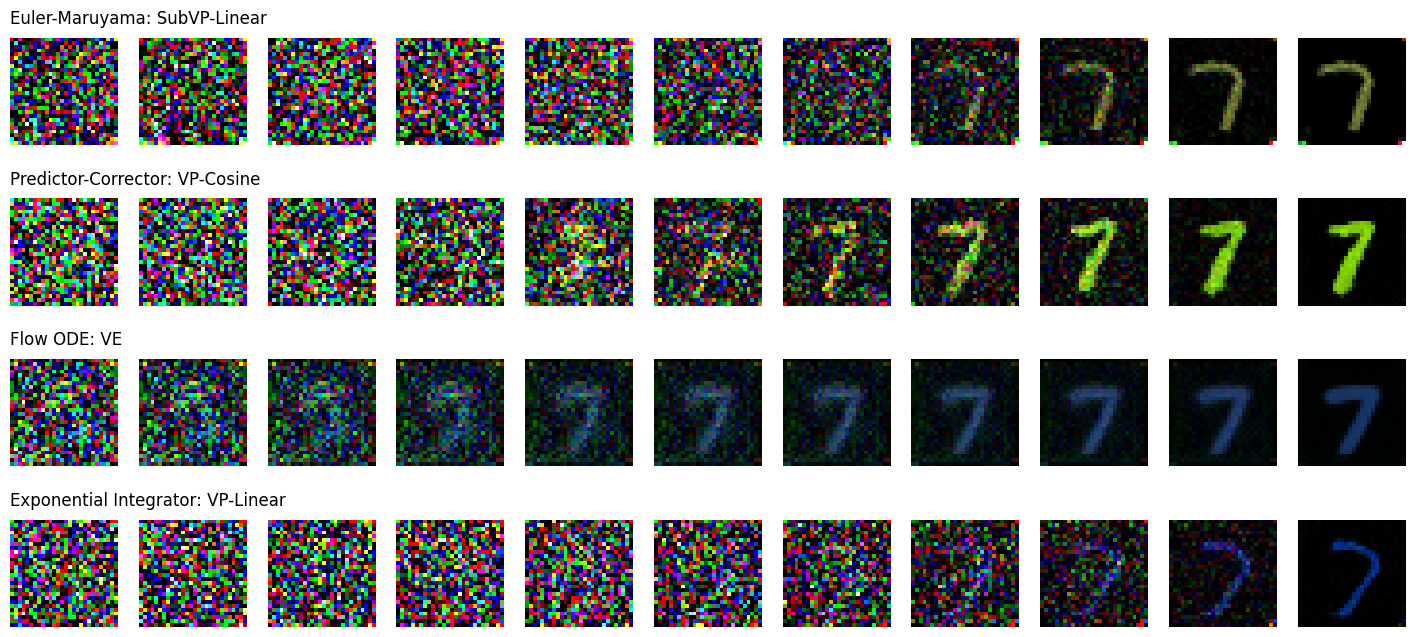

In [58]:
return_sequences2 = torch.cat((return_sequence1[1], return_sequence2[1]), dim = 1)
return_sequences1 = torch.cat((return_sequence4[1], return_sequence3[1]), dim = 1)
return_sequences3 = torch.cat((return_sequences1, return_sequences2), dim = 1)

titulos = ["Euler-Maruyama: SubVP-Linear", "Predictor-Corrector: VP-Cosine", "Flow ODE: VE", "Exponential Integrator: VP-Linear"]

plot_image_evolution(return_sequences3, 4, [200, 400, 600, 800, 1000, 1100, 1200, 1300, 1375, 1450, 1500], (18, 8), titulos)